In [1]:
# module imports
import geopandas as gpd
import numpy as np
import pandas as pd
import shapely
from libpysal import graph
from sklearn import ensemble, metrics, model_selection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score 
import warnings
import utils
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

# settings
seed = 0
all_possible_classes = list(range(1, 11))
strategies = ["non_weighted_model", "weighted_model"]
folds = [0, 1, 2, 3, 4]

# Berlin

## Data import

In [2]:
# load splited reference data
splited_ref_data = gpd.read_file(r'ref_data\berlin_ref_splitS1.gpkg')

# load tessellation cells with morphometrics
data = gpd.read_parquet(r'momepy\berlin_morphometrics.parquet')

In [3]:
# results[setup][strategy][fold]
results = {
    strat: {
        fold: {} for fold in folds
    } for strat in strategies
}

### Fold 0

In [4]:
fold=0
fold0_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [5]:
X_train = fold0_data["X_train"]
y_train = fold0_data["y_train"]
X_test = fold0_data["X_test"]
y_test = fold0_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=3, max_features=X_train.shape[1], class_weight=False)

In [ ]:
param, train, test, diff

In [6]:
model_fold0 = ensemble.RandomForestClassifier(random_state=seed, n_jobs=-1, max_depth=3, max_features=46, n_estimators=100)

model_fold0.fit(X_train, y_train)
pred_test = model_fold0.predict(X_test)

In [7]:
# training accuracy
pred_train = model_fold0.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  86.58
wF1 train:  85.06


In [8]:
# test accuracy
pred_test = model_fold0.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold0,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)

results["non_weighted_model"][fold] = accuracies

OA test:  83.93
wF1 test:  80.44


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [9]:
model_fold0_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=seed, n_jobs=-1, max_depth=2, max_features=23, n_estimators=100)

model_fold0_weighted.fit(X_train, y_train)
pred_test = model_fold0_weighted.predict(X_test)

In [10]:
# training accuracy
pred_train = model_fold0_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  71.47
wF1 train:  68.43


In [11]:
# test accuracy
pred_test = model_fold0_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold0_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)

results["weighted_model"][fold] = accuracies

OA test:  62.26
wF1 test:  62.17


### Fold 1

In [12]:
fold=1
fold1_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [13]:
X_train = fold1_data["X_train"]
y_train = fold1_data["y_train"]
X_test = fold1_data["X_test"]
y_test = fold1_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=False)

In [ ]:
param, train, test, diff

In [14]:
model_fold1 = ensemble.RandomForestClassifier(random_state=seed, n_jobs=-1, max_depth=2, max_features=1, n_estimators=100)

model_fold1.fit(X_train, y_train)
pred_test = model_fold1.predict(X_test)

In [15]:
# training accuracy
pred_train = model_fold1.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  76.38
wF1 train:  69.96


In [16]:
# test accuracy
pred_test = model_fold1.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold1,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)

results["non_weighted_model"][fold] = accuracies

OA test:  71.7
wF1 test:  64.88


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [17]:
model_fold1_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=seed, n_jobs=-1, max_depth=2, max_features=91, n_estimators=100)

model_fold1_weighted.fit(X_train, y_train)
pred_test = model_fold1_weighted.predict(X_test)

In [18]:
# training accuracy
pred_train = model_fold1_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  70.8
wF1 train:  70.34


In [19]:
# test accuracy
pred_test = model_fold1_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold1_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["weighted_model"][fold] = accuracies

OA test:  63.45
wF1 test:  60.47


### Fold 2

In [20]:
fold=2
fold2_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [21]:
X_train = fold2_data["X_train"]
y_train = fold2_data["y_train"]
X_test = fold2_data["X_test"]
y_test = fold2_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=False)

In [22]:
model_fold2 = ensemble.RandomForestClassifier(random_state=seed, n_jobs=-1, max_depth=2, max_features=6, n_estimators=100)

model_fold2.fit(X_train, y_train)
pred_test = model_fold2.predict(X_test)

In [23]:
# training accuracy
pred_train = model_fold2.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  79.39
wF1 train:  73.74


In [24]:
# test accuracy
pred_test = model_fold2.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold2,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["non_weighted_model"][fold] = accuracies

OA test:  78.97
wF1 test:  70.81


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [25]:
model_fold2_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=seed, n_jobs=-1, max_depth=2, max_features=4, n_estimators=100)

model_fold2_weighted.fit(X_train, y_train)
pred_test = model_fold2_weighted.predict(X_test)

In [26]:
# training accuracy
pred_train = model_fold2_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  62.7
wF1 train:  62.75


In [27]:
# test accuracy
pred_test = model_fold2_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold2_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["weighted_model"][fold] = accuracies

OA test:  57.91
wF1 test:  57.57


### Fold 3

In [28]:
fold=3
fold3_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [29]:
X_train = fold3_data["X_train"]
y_train = fold3_data["y_train"]
X_test = fold3_data["X_test"]
y_test = fold3_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=False)

In [ ]:
param, train, test, diff

In [30]:
model_fold3 = ensemble.RandomForestClassifier(random_state=seed, n_jobs=-1, max_depth=4, max_features=40, n_estimators=100)

model_fold3.fit(X_train, y_train)
pred_test = model_fold3.predict(X_test)

In [31]:
# training accuracy
pred_train = model_fold3.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  89.76
wF1 train:  88.36


In [32]:
# test accuracy
pred_test = model_fold3.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold3,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["non_weighted_model"][fold] = accuracies

OA test:  84.81
wF1 test:  82.78


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=6, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [33]:
model_fold3_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=seed, n_jobs=-1, max_depth=6, max_features=6, n_estimators=100)

model_fold3_weighted.fit(X_train, y_train)
pred_test = model_fold3_weighted.predict(X_test)

In [34]:
# training accuracy
pred_train = model_fold3_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  89.36
wF1 train:  89.62


In [35]:
# test accuracy
pred_test = model_fold3_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold3_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["weighted_model"][fold] = accuracies

OA test:  88.02
wF1 test:  87.69


### Fold 4

In [36]:
fold=4
fold4_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [37]:
X_train = fold4_data["X_train"]
y_train = fold4_data["y_train"]
X_test = fold4_data["X_test"]
y_test = fold4_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=False)

In [ ]:
param, train, test, diff

In [38]:
model_fold4 = ensemble.RandomForestClassifier(random_state=seed, n_jobs=-1, max_depth=2, max_features=28, n_estimators=100)

model_fold4.fit(X_train, y_train)
pred_test = model_fold4.predict(X_test)

In [39]:
# training accuracy
pred_train = model_fold4.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  81.46
wF1 train:  76.5


In [40]:
# test accuracy
pred_test = model_fold4.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold4,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)

results["non_weighted_model"][fold] = accuracies

OA test:  77.53
wF1 test:  71.66


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=6, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [41]:
model_fold4_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=seed, n_jobs=-1, max_depth=2, max_features=5, n_estimators=100)

model_fold4_weighted.fit(X_train, y_train)
pred_test = model_fold4_weighted.predict(X_test)

In [42]:
# training accuracy
pred_train = model_fold4_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  72.63
wF1 train:  72.15


In [43]:
# test accuracy
pred_test = model_fold4_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold4_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["weighted_model"][fold] = accuracies

OA test:  69.57
wF1 test:  67.17


## Evaluation

In [44]:
df = pd.DataFrame.from_dict({
    (i, j): results[i][j] 
    for i in results.keys() 
    for j in results[i].keys() 
}, orient='index')

df.index.names = ["Strategy", "Fold"]
df

OA    wF1  \
Strategy           Fold                 
non_weighted_model 0     83.93  80.44   
                   1     71.70  64.88   
                   2     78.97  70.81   
                   3     84.81  82.78   
                   4     77.53  71.66   
weighted_model     0     62.26  62.17   
                   1     63.45  60.47   
                   2     57.91  57.57   
                   3     88.02  87.69   
                   4     69.57  67.17   

                                                                     Model  \
Strategy           Fold                                                      
non_weighted_model 0     (DecisionTreeClassifier(max_depth=3, max_featu...   
                   1     (DecisionTreeClassifier(max_depth=2, max_featu...   
                   2     (DecisionTreeClassifier(max_depth=2, max_featu...   
                   3     (DecisionTreeClassifier(max_depth=4, max_featu...   
                   4     (DecisionTreeClassifier(max_depth=2, max_featu...   
weighted_model     0     (DecisionTreeClassifier(max_depth=2, max_featu...   
                   1     (DecisionTreeClassifier(max_depth=2, max_featu...   
                   2     (DecisionTreeClassifier(max_depth=2, max_featu...   
                   3     (DecisionTreeClassifier(max_depth=6, max_featu...   
                   4     (DecisionTreeClassifier(max_depth=2, max_featu...   

                                                          Confusion_Matrix  \
Strategy           Fold                                                      
non_weighted_model 0     [[2544, 0, 311, 0, 0, 0], [0, 0, 274, 0, 2, 0]...   
                   1     [[2003, 0, 801, 43, 0, 0], [0, 0, 368, 13, 0, ...   
                   2     [[2476, 0, 12, 0, 0, 0], [41, 0, 205, 15, 0, 0...   
                   3     [[1504, 0, 222, 0, 0, 0], [0, 0, 65, 26, 0, 0]...   
                   4     [[2950, 0, 659, 0, 0, 0], [89, 0, 275, 182, 0,...   
weighted_model     0     [[2847, 3, 0, 0, 5, 0], [134, 72, 15, 0, 55, 0...   
                   1     [[2842, 4, 1, 0, 0, 0], [0, 381, 0, 0, 0, 0], ...   
                   2     [[2482, 6, 0, 0, 0, 0], [0, 235, 0, 1, 15, 10]...   
                   3     [[1578, 2, 146, 0, 0, 0], [0, 48, 29, 12, 2, 0...   
                   4     [[3576, 32, 1, 0, 0, 0], [124, 250, 74, 4, 22,...   

                         F1_Class_1  F1_Class_2  F1_Class_3  F1_Class_4  \
Strategy           Fold                                                   
non_weighted_model 0            NaN       83.92         NaN        0.00   
                   1            NaN       80.93         NaN        0.00   
                   2            NaN       96.79         NaN        0.00   
                   3            NaN       83.05         NaN        0.00   
                   4            NaN       76.65         NaN        0.00   
weighted_model     0            NaN       73.57         NaN       10.80   
                   1            NaN       78.35         NaN       21.86   
                   2            NaN       74.67         NaN       31.56   
                   3            NaN       82.45         NaN       53.93   
                   4            NaN       75.44         NaN       28.70   

                         F1_Class_5  F1_Class_6  F1_Class_7  F1_Class_8  \
Strategy           Fold                                                   
non_weighted_model 0          71.08       93.40         NaN       65.71   
                   1          59.91       83.29         NaN        0.00   
                   2          78.97       87.14         NaN        0.00   
                   3          68.81       91.13         NaN       91.30   
                   4          65.74       90.40         NaN        0.00   
weighted_model     0           4.72       79.73         NaN       73.45   
                   1          35.34       78.37         NaN       89.17   
                   2           7.38       68.25         NaN       64.92   
          

In [45]:
# mean metrics across folds
df_metrics = df.drop(columns=["Model","Confusion_Matrix"])
averages = df_metrics.groupby(["Strategy"]).mean().round(2)
averages

,OA,wF1,F1_Class_1,F1_Class_2,F1_Class_3,F1_Class_4,F1_Class_5,F1_Class_6,F1_Class_7,F1_Class_8,F1_Class_9,F1_Class_10
Strategy,,,,,,,,,,,,
non_weighted_model,79.39,74.11,NaN,84.27,NaN,0.00,68.90,89.07,NaN,31.40,8.27,NaN
weighted_model,68.24,67.01,NaN,76.90,NaN,29.37,28.63,80.96,NaN,81.79,34.66,NaN


In [107]:
# export results
df_metrics.to_csv(r"results\s1\berlin_S1_results.csv")

## Confusion Matrix

In [46]:
better_strategy = df.groupby("Strategy")["wF1"].mean().idxmax()
better_strategy

'non_weighted_model'

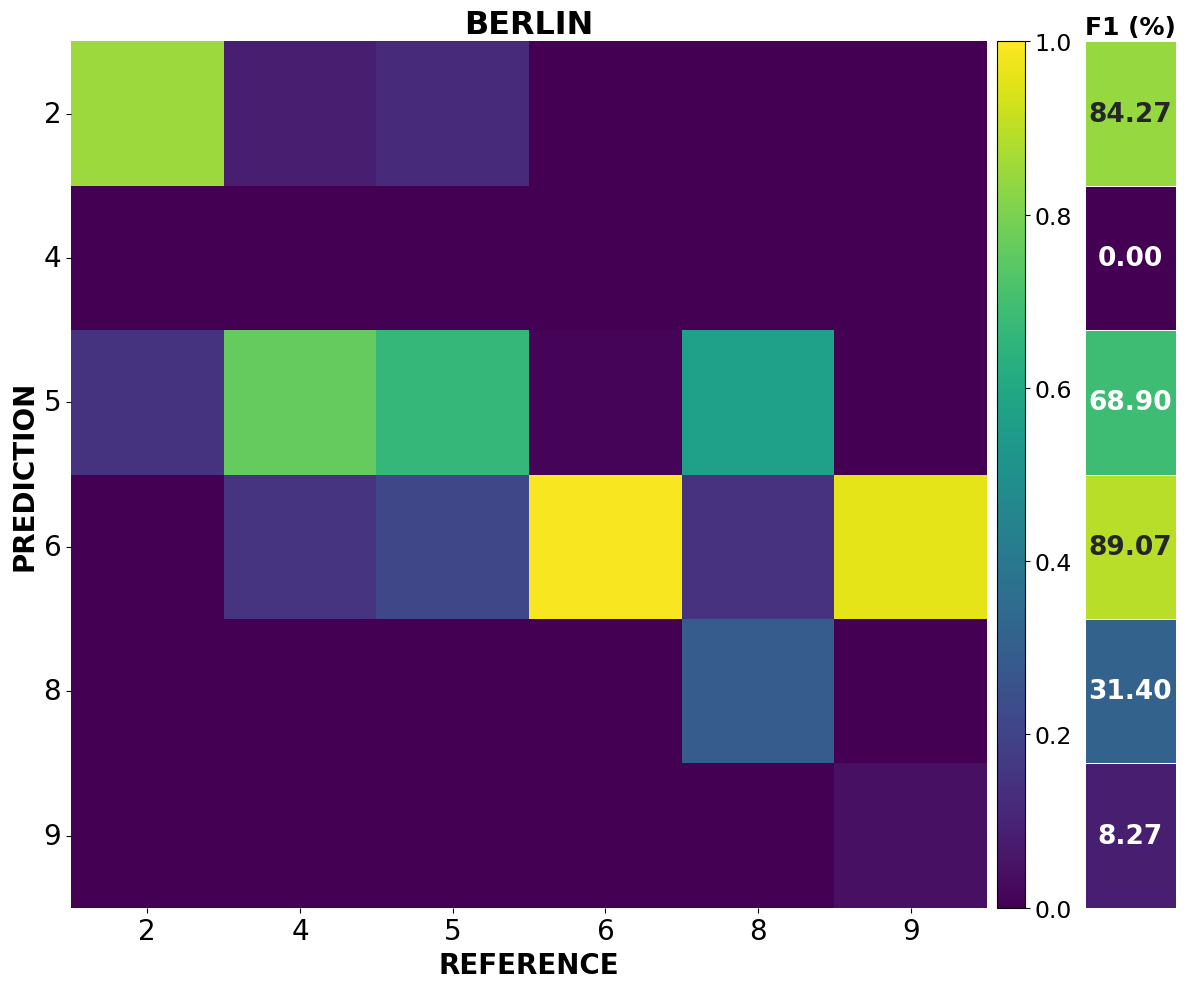

In [47]:
ordered_labels = sorted(splited_ref_data['gridcode'].unique())
stats_row = averages.loc[better_strategy]
f1_values = []
for label in ordered_labels:
    col_name = f"F1_Class_{label}"
    val = stats_row.get(col_name, np.nan)
    f1_values.append(val)

f1_matrix = np.array(f1_values).reshape(-1, 1)

total_cm = None
for fold in results[better_strategy]:
    fold_cm = results[better_strategy][fold]["Confusion_Matrix"]
    if total_cm is None:
        total_cm = fold_cm.copy()
    else:
        total_cm += fold_cm

row_sums = total_cm.sum(axis=1)[:, np.newaxis]
norm_cm = total_cm.astype('float') / (row_sums + 1e-10)
plot_matrix = norm_cm.T 

# Create Figure
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(plot_matrix, 
            annot=False, 
            fmt='.2f', 
            cmap='viridis', 
            vmin=0.0, 
            vmax=1.0, 
            xticklabels=ordered_labels, 
            yticklabels=ordered_labels,
            cbar=False, 
            ax=ax)
divider = make_axes_locatable(ax)
# colorbar
cax = divider.append_axes("right", size="3%", pad=0.1)
plt.colorbar(ax.collections[0], cax=cax)
cax.tick_params(labelsize=17)
# f1
f1_ax = divider.append_axes("right", size="10%", pad=0.6)
sns.heatmap(f1_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='viridis', 
            cbar=False,   
            xticklabels=[],
            yticklabels=[], 
            ax=f1_ax,
            vmin=0, vmax=100,
           annot_kws={'size': 19, 'weight': 'bold'},
           linewidths=.7,
            linecolor='white')
f1_ax.set_title("F1 (%)", fontsize=18, fontweight='bold', pad=5)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20, rotation=0)
ax.set_xlabel('REFERENCE', fontsize=20, fontweight='bold')
ax.set_ylabel('PREDICTION', fontsize=20, fontweight='bold')
ax.set_title('BERLIN', fontweight='bold', fontsize=23)
plt.tight_layout()
plt.savefig(r'figures\S1_berlin_matrix_v2.png', dpi=500, bbox_inches='tight')
plt.show()

In [48]:
np.save(r"results\s1\berlin_S1_summed_cm.npy", total_cm)

## Prediction

In [48]:
better_strategy = df.groupby("Strategy")["wF1"].mean().idxmax()
better_strategy

'non_weighted_model'

In [49]:
models = df.loc[better_strategy, "Model"].tolist()
models

[RandomForestClassifier(max_depth=3, max_features=46, n_jobs=-1, random_state=0),
 RandomForestClassifier(max_depth=2, max_features=1, n_jobs=-1, random_state=0),
 RandomForestClassifier(max_depth=2, max_features=6, n_jobs=-1, random_state=0),
 RandomForestClassifier(max_depth=4, max_features=40, n_jobs=-1, random_state=0),
 RandomForestClassifier(max_depth=2, max_features=28, n_jobs=-1, random_state=0)]

In [136]:
data_for_pred =  data.drop(['focal', 'geometry'], axis=1)
for f, m in enumerate(models):
    pred = m.predict(data_for_pred)
    classified = data['geometry']
    classified = gpd.GeoDataFrame(classified)
    classified['class'] = pred
    classified.to_parquet(fr"outputs\s1\berlin_S1_fold{folds[f]}.parquet", compression='zstd')
    print(fr"outputs\s1\berlin_S1_fold{folds[f]}.parquet saved")

s1_outputs\berlin_S1_fold0.gpkg saved
s1_outputs\berlin_S1_fold1.gpkg saved
s1_outputs\berlin_S1_fold2.gpkg saved
s1_outputs\berlin_S1_fold3.gpkg saved
s1_outputs\berlin_S1_fold4.gpkg saved


## Aggregation to 100m

In [ ]:
for fold in folds:
    input_filename = fr"outputs\s1\berlin_S1_fold{fold}.parquet"
    output_filename = fr"outputs\s1\berlin_S1_fold{fold}_100m.parquet"
    utils.aggregate(input_filename, "class", 100, output_filename)

In [140]:
aggr_results = []
for fold in folds:
    pred_path = fr"outputs\s1\berlin_S1_fold{fold}_100m.parquet"
    pred_gdf = gpd.read_parquet(pred_path)
    
    test_polygons = splited_ref_data[splited_ref_data["fold"] == fold].copy()
    
    pred_centroids = pred_gdf.copy()
    pred_centroids['geometry'] = pred_centroids.centroid
    
    joined = gpd.sjoin(pred_centroids, test_polygons, how='left', predicate='within')
    
    if 'gridcode' in joined.columns:
        joined = joined.rename(columns={'gridcode': 'y_true'})
    else:
        print(f"Fold {fold}: No grid centers fell inside test polygons")
        continue

    valid_data = joined.dropna(subset=['class', 'y_true'])
    
    y_pred = valid_data['class']
    y_true = valid_data['y_true']
    
    if len(y_true) == 0:
        print(f"Fold {fold}: No valid data")
        continue

    oa = metrics.accuracy_score(y_true, y_pred)
    wf1 = metrics.f1_score(y_true, y_pred, average='weighted')
    
    current_labels = sorted(list(set(y_true) | set(y_pred)))
    f1_per_class = metrics.f1_score(y_true, y_pred, average=None, labels=current_labels)
    
    fold_res = {
        'Fold': fold,
        'OA': round(oa*100,2),
        'wF1': round(wf1*100,2)
    }

    for c in all_possible_classes:
        fold_res[f"F1_Class_{c}"] = np.nan
    
    for label, score in zip(current_labels, f1_per_class):
        if label in all_possible_classes:
            fold_res[f"F1_Class_{int(label)}"] = round(score * 100, 2)
        
    aggr_results.append(fold_res)

In [141]:
aggregated_res_df = pd.DataFrame(aggr_results).set_index("Fold")
aggregated_res_df

,OA,wF1,F1_Class_1,F1_Class_2,F1_Class_3,F1_Class_4,F1_Class_5,F1_Class_6,F1_Class_7,F1_Class_8,F1_Class_9,F1_Class_10
Fold,,,,,,,,,,,,
0,76.08,71.54,NaN,81.61,NaN,0.0,67.26,91.76,NaN,79.94,0.00,NaN
1,61.73,51.75,NaN,86.57,NaN,0.0,53.56,79.33,NaN,0.00,0.00,NaN
2,63.39,51.31,NaN,96.37,NaN,0.0,59.80,80.00,NaN,0.00,0.00,NaN
3,83.83,82.04,NaN,86.89,NaN,0.0,75.76,89.56,NaN,92.48,39.53,NaN
4,68.52,60.50,NaN,72.94,NaN,0.0,66.30,89.38,NaN,0.00,0.00,NaN


In [142]:
aggregated_res_df.to_csv(r"results\s1\berlin_S1_aggregated_results.csv")

## Rasterization of top morphometrics

For fusion-based predictions (S3-S4) rasterize top 20 most important morphometrics of the best non-weighted and weighted model (determined by model's F1).

In [49]:
best_models_df = df.sort_values("wF1", ascending=False).groupby("Strategy").head(1)
best_models_df

,,OA,wF1,Model,Confusion_Matrix,F1_Class_1,F1_Class_2,F1_Class_3,F1_Class_4,F1_Class_5,F1_Class_6,F1_Class_7,F1_Class_8,F1_Class_9,F1_Class_10
Strategy,Fold,,,,,,,,,,,,,,
weighted_model,3,88.02,87.69,"(DecisionTreeClassifier(max_depth=6, max_featu...","[[1578, 2, 146, 0, 0, 0], [0, 48, 29, 12, 2, 0...",NaN,82.45,NaN,53.93,74.43,93.16,NaN,92.45,79.77,NaN
non_weighted_model,3,84.81,82.78,"(DecisionTreeClassifier(max_depth=4, max_featu...","[[1504, 0, 222, 0, 0, 0], [0, 0, 65, 26, 0, 0]...",NaN,83.05,NaN,0.00,68.81,91.13,NaN,91.30,41.33,NaN


### Best non-weighted RF model

In [50]:
# select the best non-weighted model
best_non_weighted_model = best_models_df.loc["non_weighted_model"].iloc[0]["Model"]

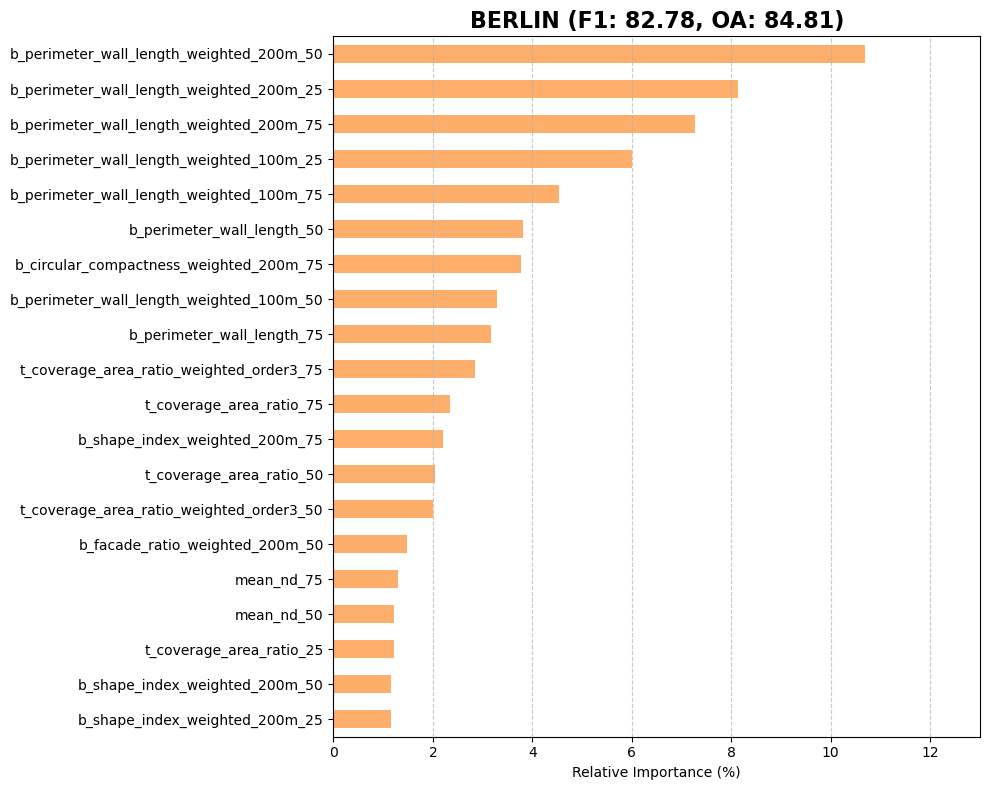

In [51]:
# get 20 most important morphometrics of the best non-weighted model
feature_importance = pd.Series(best_non_weighted_model.feature_importances_, index=best_non_weighted_model.feature_names_in_)
top_features = feature_importance.sort_values(ascending=False).head(20)
top_features_percent = top_features * 100

# figure
fig, ax = plt.subplots(figsize=(10, 8))
top_features_percent.sort_values().plot(kind='barh', color='#fdae6b', ax=ax)

ax.set_xlabel('Relative Importance (%)')
ax.set_title(f'BERLIN (F1: {best_models_df.loc["non_weighted_model"]["wF1"].iloc[0]}, OA: {best_models_df.loc["non_weighted_model"]["OA"].iloc[0]})', fontweight='bold', fontsize=16)
ax.set_xlim(0, 13)
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
#plt.savefig('S1_berlin_importances.png', dpi=300, bbox_inches='tight')
plt.show()

In [52]:
top_features_percent.to_csv(r'results\s1\berlin_S1_top_features_non_weighted_model.csv')

In [ ]:
## rasterize
# filepath to Sentinel-2 imagery (raster to match)
imagery = r'imagery\berlin_20170519.tif'

# output
output_path = r'rasterized_morphometrics\berlin_rasterized_morphometrics_fold3.tif'

utils.rasterize_top20_morphometrics(imagery, output_path, data, best_non_weighted_model)

### Best RF weighted model

In [53]:
# choose the best weighted model
best_weighted_model = best_models_df.loc["weighted_model"].iloc[0]["Model"]

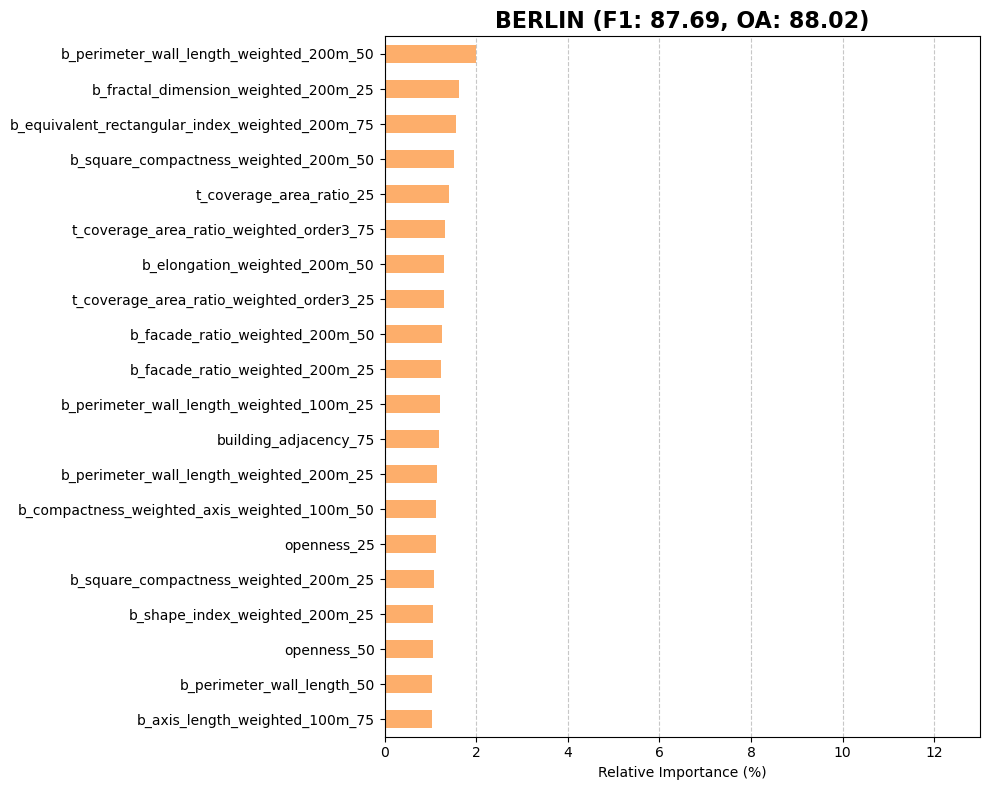

In [54]:
# get 20 most important morphometrics of the best weighted model
feature_importance = pd.Series(best_weighted_model.feature_importances_, index=best_weighted_model.feature_names_in_)
top_features = feature_importance.sort_values(ascending=False).head(20)
top_features_percent = top_features * 100

# figure
fig, ax = plt.subplots(figsize=(10, 8))
top_features_percent.sort_values().plot(kind='barh', color='#fdae6b', ax=ax)

ax.set_xlabel('Relative Importance (%)')
ax.set_title(f'BERLIN (F1: {best_models_df.loc["weighted_model"]["wF1"].iloc[0]}, OA: {best_models_df.loc["weighted_model"]["OA"].iloc[0]})', fontweight='bold', fontsize=16)
ax.set_xlim(0, 13)
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [55]:
top_features_percent.to_csv(r'results\s1\berlin_S1_top_features_weighted_model.csv')

In [ ]:
## rasterize them
# filepath to Sentinel-2 imagery (raster to match)
imagery = r'imagery\berlin_20170519.tif'

# output
output_path = r'rasterized_morphometrics\berlin_rasterized_morphometrics_fold3_weighted.tif'

utils.rasterize_top20_morphometrics(imagery, output_path, data, best_weighted_model)

# Hong Kong

## Data import

In [2]:
# load splited reference data
splited_ref_data = gpd.read_file(r'ref_data\hongkong_ref_splitS1.gpkg')

# load tessellation cells with morphometrics
data = gpd.read_parquet(r'momepy\hongkong_morphometrics.parquet')

In [3]:
# results[setup][strategy][fold]
results = {
    strat: {
        fold: {} for fold in folds
    } for strat in strategies
}

### Fold 0

In [4]:
fold=0
fold0_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [5]:
X_train = fold0_data["X_train"]
y_train = fold0_data["y_train"]
X_test = fold0_data["X_test"]
y_test = fold0_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=3, max_features=X_train.shape[1], class_weight=False)

In [ ]:
param, train, test, diff

In [6]:
model_fold0 = ensemble.RandomForestClassifier(random_state=seed, n_jobs=-1, max_depth=3, max_features=4, n_estimators=100)

model_fold0.fit(X_train, y_train)
pred_test = model_fold0.predict(X_test)

In [7]:
# training accuracy
pred_train = model_fold0.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  78.06
wF1 train:  74.17


In [8]:
# test accuracy
pred_test = model_fold0.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold0,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)

results["non_weighted_model"][fold] = accuracies

OA test:  68.27
wF1 test:  64.22


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [9]:
model_fold0_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=seed, n_jobs=-1, max_depth=2, max_features=1, n_estimators=100)

model_fold0_weighted.fit(X_train, y_train)
pred_test = model_fold0_weighted.predict(X_test)

In [10]:
# training accuracy
pred_train = model_fold0_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  82.37
wF1 train:  82.23


In [11]:
# test accuracy
pred_test = model_fold0_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold0_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)

results["weighted_model"][fold] = accuracies

OA test:  75.8
wF1 test:  75.59


### Fold 1

In [12]:
fold=1
fold1_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [13]:
X_train = fold1_data["X_train"]
y_train = fold1_data["y_train"]
X_test = fold1_data["X_test"]
y_test = fold1_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=False)

In [ ]:
param, train, test, diff

In [14]:
model_fold1 = ensemble.RandomForestClassifier(random_state=seed, n_jobs=-1, max_depth=1, max_features=25, n_estimators=100)

model_fold1.fit(X_train, y_train)
pred_test = model_fold1.predict(X_test)

In [15]:
# training accuracy
pred_train = model_fold1.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  59.49
wF1 train:  46.72


In [16]:
# test accuracy
pred_test = model_fold1.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold1,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)

results["non_weighted_model"][fold] = accuracies

OA test:  59.41
wF1 test:  46.33


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [17]:
model_fold1_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=seed, n_jobs=-1, max_depth=1, max_features=55, n_estimators=100)

model_fold1_weighted.fit(X_train, y_train)
pred_test = model_fold1_weighted.predict(X_test)

In [18]:
# training accuracy
pred_train = model_fold1_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  61.08
wF1 train:  54.26


In [19]:
# test accuracy
pred_test = model_fold1_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold1_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["weighted_model"][fold] = accuracies

OA test:  64.89
wF1 test:  56.27


### Fold 2

In [20]:
fold=2
fold2_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [21]:
X_train = fold2_data["X_train"]
y_train = fold2_data["y_train"]
X_test = fold2_data["X_test"]
y_test = fold2_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=False)

In [22]:
model_fold2 = ensemble.RandomForestClassifier(random_state=seed, n_jobs=-1, max_depth=2, max_features=1, n_estimators=100)

model_fold2.fit(X_train, y_train)
pred_test = model_fold2.predict(X_test)

In [23]:
# training accuracy
pred_train = model_fold2.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  68.81
wF1 train:  59.76


In [24]:
# test accuracy
pred_test = model_fold2.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold2,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["non_weighted_model"][fold] = accuracies

OA test:  67.74
wF1 test:  57.79


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [25]:
model_fold2_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=seed, n_jobs=-1, max_depth=2, max_features=18, n_estimators=100)

model_fold2_weighted.fit(X_train, y_train)
pred_test = model_fold2_weighted.predict(X_test)

In [26]:
# training accuracy
pred_train = model_fold2_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  73.04
wF1 train:  73.05


In [27]:
# test accuracy
pred_test = model_fold2_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold2_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["weighted_model"][fold] = accuracies

OA test:  69.19
wF1 test:  68.89


### Fold 3

In [28]:
fold=3
fold3_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [29]:
X_train = fold3_data["X_train"]
y_train = fold3_data["y_train"]
X_test = fold3_data["X_test"]
y_test = fold3_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=False)

In [ ]:
param, train, test, diff

In [30]:
model_fold3 = ensemble.RandomForestClassifier(random_state=seed, n_jobs=-1, max_depth=2, max_features=48, n_estimators=100)

model_fold3.fit(X_train, y_train)
pred_test = model_fold3.predict(X_test)

In [31]:
# training accuracy
pred_train = model_fold3.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  78.1
wF1 train:  74.91


In [32]:
# test accuracy
pred_test = model_fold3.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold3,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["non_weighted_model"][fold] = accuracies

OA test:  76.94
wF1 test:  73.27


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=6, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [33]:
model_fold3_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=seed, n_jobs=-1, max_depth=2, max_features=25, n_estimators=100)

model_fold3_weighted.fit(X_train, y_train)
pred_test = model_fold3_weighted.predict(X_test)

In [34]:
# training accuracy
pred_train = model_fold3_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  77.09
wF1 train:  77.78


In [35]:
# test accuracy
pred_test = model_fold3_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold3_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["weighted_model"][fold] = accuracies

OA test:  72.48
wF1 test:  74.01


### Fold 4

In [36]:
fold=4
fold4_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [37]:
X_train = fold4_data["X_train"]
y_train = fold4_data["y_train"]
X_test = fold4_data["X_test"]
y_test = fold4_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=False)

In [ ]:
param, train, test, diff

In [38]:
model_fold4 = ensemble.RandomForestClassifier(random_state=seed, n_jobs=-1, max_depth=1, max_features=8, n_estimators=100)

model_fold4.fit(X_train, y_train)
pred_test = model_fold4.predict(X_test)

In [39]:
# training accuracy
pred_train = model_fold4.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  58.07
wF1 train:  44.78


In [40]:
# test accuracy
pred_test = model_fold4.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold4,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)

results["non_weighted_model"][fold] = accuracies

OA test:  57.67
wF1 test:  49.28


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=6, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [41]:
model_fold4_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=seed, n_jobs=-1, max_depth=1, max_features=5, n_estimators=100)

model_fold4_weighted.fit(X_train, y_train)
pred_test = model_fold4_weighted.predict(X_test)

In [42]:
# training accuracy
pred_train = model_fold4_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  67.65
wF1 train:  65.42


In [43]:
# test accuracy
pred_test = model_fold4_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold4_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["weighted_model"][fold] = accuracies

OA test:  63.54
wF1 test:  64.85


## Evaluation

In [44]:
df = pd.DataFrame.from_dict({
    (i, j): results[i][j] 
    for i in results.keys() 
    for j in results[i].keys() 
}, orient='index')

df.index.names = ["Strategy", "Fold"]
df

OA    wF1  \
Strategy           Fold                 
non_weighted_model 0     68.27  64.22   
                   1     59.41  46.33   
                   2     67.74  57.79   
                   3     76.94  73.27   
                   4     57.67  49.28   
weighted_model     0     75.80  75.59   
                   1     64.89  56.27   
                   2     69.19  68.89   
                   3     72.48  74.01   
                   4     63.54  64.85   

                                                                     Model  \
Strategy           Fold                                                      
non_weighted_model 0     (DecisionTreeClassifier(max_depth=3, max_featu...   
                   1     (DecisionTreeClassifier(max_depth=1, max_featu...   
                   2     (DecisionTreeClassifier(max_depth=2, max_featu...   
                   3     (DecisionTreeClassifier(max_depth=2, max_featu...   
                   4     (DecisionTreeClassifier(max_depth=1, max_featu...   
weighted_model     0     (DecisionTreeClassifier(max_depth=2, max_featu...   
                   1     (DecisionTreeClassifier(max_depth=1, max_featu...   
                   2     (DecisionTreeClassifier(max_depth=2, max_featu...   
                   3     (DecisionTreeClassifier(max_depth=2, max_featu...   
                   4     (DecisionTreeClassifier(max_depth=1, max_featu...   

                                                          Confusion_Matrix  \
Strategy           Fold                                                      
non_weighted_model 0     [[752, 95, 136, 0, 0, 0, 0, 0], [391, 867, 90,...   
                   1     [[814, 0, 0, 0, 0, 0, 0, 0], [54, 0, 310, 0, 0...   
                   2     [[661, 68, 12, 0, 0, 0, 0, 0], [91, 344, 2, 0,...   
                   3     [[396, 1, 0, 84, 0, 0, 0, 0], [213, 350, 0, 21...   
                   4     [[441, 0, 0, 0, 0, 0, 0, 0], [163, 0, 87, 0, 0...   
weighted_model     0     [[641, 294, 5, 3, 40, 0, 0, 0], [145, 1203, 0,...   
                   1     [[772, 0, 0, 0, 0, 0, 0, 42], [75, 0, 120, 8, ...   
                   2     [[281, 437, 0, 5, 0, 0, 18, 0], [36, 401, 0, 0...   
                   3     [[273, 0, 0, 89, 38, 0, 70, 11], [146, 402, 0,...   
                   4     [[200, 105, 0, 0, 63, 0, 73, 0], [105, 18, 59,...   

                         F1_Class_1  F1_Class_2  F1_Class_3  F1_Class_4  \
Strategy           Fold                                                   
non_weighted_model 0          63.84       75.06       78.34       35.27   
                   1          74.07        0.00       71.10        0.00   
                   2          68.85       81.04       84.59        0.00   
                   3          65.02       74.31       94.04       42.98   
                   4          46.96        0.00       81.29        0.00   
weighted_model     0          72.27       83.08       89.40       54.79   
                   1          82.88        0.00       80.02        2.74   
                   2          52.04       62.90       93.20       53.18   
                   3          51.56       71.28       91.12        0.65   
                   4          53.40        6.57       89.41        3.10   

                         F1_Class_5  F1_Class_6  F1_Class_7  F1_Class_8  \
Strategy           Fold                                                   
non_weighted_model 0           0.00       26.33         NaN        0.00   
                   1           0.00        0.00         NaN        0.00   
                   2           0.00        0.00         NaN        0.00   
                   3           0.00       19.57         NaN        0.00   
                   4           0.00        0.00         NaN        0.00   
weighted_model     0          33.61       44.22         NaN        4.65   
                   1           0.00        0.00         NaN        0.00   
                   2          24.56       76.92         NaN       15.69   
          

In [45]:
# mean metrics across folds
df_metrics = df.drop(columns=["Model","Confusion_Matrix"])
averages = df_metrics.groupby(["Strategy"]).mean().round(2)
averages

,OA,wF1,F1_Class_1,F1_Class_2,F1_Class_3,F1_Class_4,F1_Class_5,F1_Class_6,F1_Class_7,F1_Class_8,F1_Class_9,F1_Class_10
Strategy,,,,,,,,,,,,
non_weighted_model,66.01,58.18,63.75,46.08,81.87,15.65,0.00,9.18,NaN,0.00,NaN,16.73
weighted_model,69.18,67.92,62.43,44.77,88.63,22.89,22.18,42.30,NaN,9.32,NaN,74.55


In [54]:
# export results
df_metrics.to_csv(r"results\s1\hongkong_S1_results.csv")

## Confusion Matrix

In [46]:
better_strategy = df.groupby("Strategy")["wF1"].mean().idxmax()
better_strategy

'weighted_model'

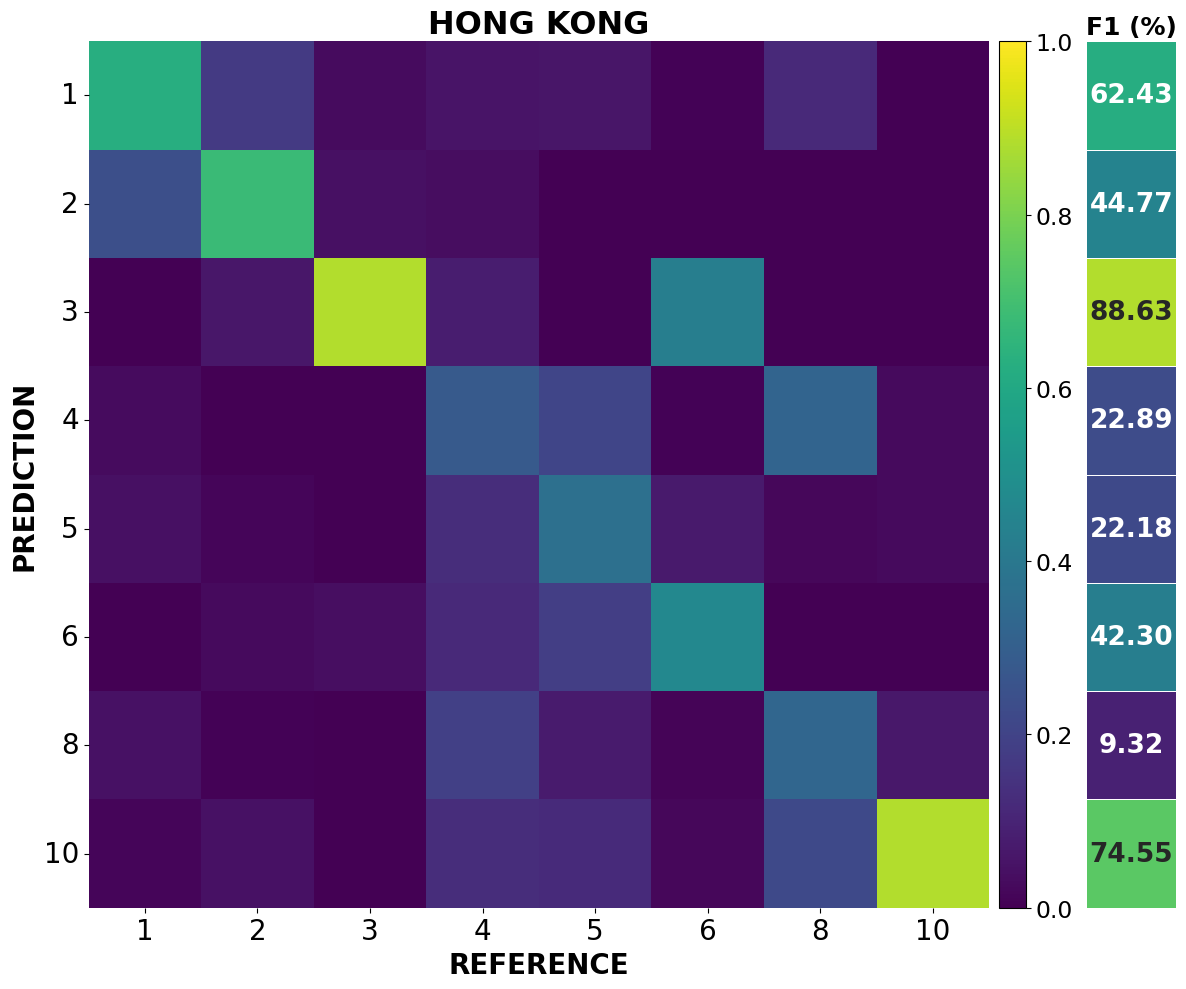

In [47]:
ordered_labels = sorted(splited_ref_data['gridcode'].unique())
stats_row = averages.loc[better_strategy]
f1_values = []
for label in ordered_labels:
    col_name = f"F1_Class_{label}"
    val = stats_row.get(col_name, np.nan)
    f1_values.append(val)

f1_matrix = np.array(f1_values).reshape(-1, 1)

total_cm = None
for fold in results[better_strategy]:
    fold_cm = results[better_strategy][fold]["Confusion_Matrix"]
    if total_cm is None:
        total_cm = fold_cm.copy()
    else:
        total_cm += fold_cm

row_sums = total_cm.sum(axis=1)[:, np.newaxis]
norm_cm = total_cm.astype('float') / (row_sums + 1e-10)
plot_matrix = norm_cm.T 

# Create Figure
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(plot_matrix, 
            annot=False, 
            fmt='.2f', 
            cmap='viridis', 
            vmin=0.0, 
            vmax=1.0, 
            xticklabels=ordered_labels, 
            yticklabels=ordered_labels,
            cbar=False, 
            ax=ax)
divider = make_axes_locatable(ax)
# colorbar
cax = divider.append_axes("right", size="3%", pad=0.1)
plt.colorbar(ax.collections[0], cax=cax)
cax.tick_params(labelsize=17)
# f1
f1_ax = divider.append_axes("right", size="10%", pad=0.6)
sns.heatmap(f1_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='viridis', 
            cbar=False,   
            xticklabels=[],
            yticklabels=[], 
            ax=f1_ax,
            vmin=0, vmax=100,
           annot_kws={'size': 19, 'weight': 'bold'},
           linewidths=.7,
            linecolor='white')
f1_ax.set_title("F1 (%)", fontsize=18, fontweight='bold', pad=5)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20, rotation=0)
ax.set_xlabel('REFERENCE', fontsize=20, fontweight='bold')
ax.set_ylabel('PREDICTION', fontsize=20, fontweight='bold')
ax.set_title('HONG KONG', fontweight='bold', fontsize=23)
plt.tight_layout()
plt.savefig(r'figures\S1_hongkong_matrix_v2.png', dpi=500, bbox_inches='tight')
plt.show()

In [48]:
np.save(r"results\s1\hongkong_S1_summed_cm.npy", total_cm)

## Prediction

In [48]:
better_strategy = df.groupby("Strategy")["wF1"].mean().idxmax()
better_strategy

'weighted_model'

In [49]:
models = df.loc[better_strategy, "Model"].tolist()
models

[RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=1,
                        n_jobs=-1, random_state=0),
 RandomForestClassifier(class_weight='balanced', max_depth=1, max_features=55,
                        n_jobs=-1, random_state=0),
 RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=18,
                        n_jobs=-1, random_state=0),
 RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=25,
                        n_jobs=-1, random_state=0),
 RandomForestClassifier(class_weight='balanced', max_depth=1, max_features=5,
                        n_jobs=-1, random_state=0)]

In [59]:
data_for_pred = data.drop(['focal', 'geometry'], axis=1)
for f, m in enumerate(models):
    pred = m.predict(data_for_pred)
    classified = data['geometry']
    classified = gpd.GeoDataFrame(classified)
    classified['class'] = pred
    classified.to_parquet(fr"outputs\s1\hongkong_S1_fold{folds[f]}.parquet", compression='zstd')
    print(fr"outputs\s1\hongkong_S1_fold{folds[f]}.parquet saved")

s1_outputs\hongkong_S1_fold0.gpkg saved
s1_outputs\hongkong_S1_fold1.gpkg saved
s1_outputs\hongkong_S1_fold2.gpkg saved
s1_outputs\hongkong_S1_fold3.gpkg saved
s1_outputs\hongkong_S1_fold4.gpkg saved


## Aggregation to 100m

In [ ]:
for fold in folds:
    input_filename = fr"outputs\s1\hongkong_S1_fold{fold}.parquet"
    output_filename = fr"outputs\s1\hongkong_S1_fold{fold}_100m.parquet"
    utils.aggregate(input_filename, "class", 100, output_filename)

In [51]:
aggr_results = []
for fold in folds:
    pred_path = fr"outputs\s1\hongkong_S1_fold{fold}_100m.parquet"
    pred_gdf = gpd.read_parquet(pred_path)
    
    test_polygons = splited_ref_data[splited_ref_data["fold"] == fold].copy()
    
    pred_centroids = pred_gdf.copy()
    pred_centroids['geometry'] = pred_centroids.centroid
    
    joined = gpd.sjoin(pred_centroids, test_polygons, how='left', predicate='within')
    
    if 'gridcode' in joined.columns:
        joined = joined.rename(columns={'gridcode': 'y_true'})
    else:
        print(f"Fold {fold}: No grid centers fell inside test polygons")
        continue

    valid_data = joined.dropna(subset=['class', 'y_true'])
    
    y_pred = valid_data['class']
    y_true = valid_data['y_true']
    
    if len(y_true) == 0:
        print(f"Fold {fold}: No valid data")
        continue

    oa = metrics.accuracy_score(y_true, y_pred)
    wf1 = metrics.f1_score(y_true, y_pred, average='weighted')
    
    current_labels = sorted(list(set(y_true) | set(y_pred)))
    f1_per_class = metrics.f1_score(y_true, y_pred, average=None, labels=current_labels)
    
    fold_res = {
        'Fold': fold,
        'OA': round(oa*100,2),
        'wF1': round(wf1*100,2)
    }

    for c in all_possible_classes:
        fold_res[f"F1_Class_{c}"] = np.nan
    
    for label, score in zip(current_labels, f1_per_class):
        if label in all_possible_classes:
            fold_res[f"F1_Class_{int(label)}"] = round(score * 100, 2)
        
    aggr_results.append(fold_res)

In [52]:
aggregated_res_df = pd.DataFrame(aggr_results).set_index("Fold")
aggregated_res_df

,OA,wF1,F1_Class_1,F1_Class_2,F1_Class_3,F1_Class_4,F1_Class_5,F1_Class_6,F1_Class_7,F1_Class_8,F1_Class_9,F1_Class_10
Fold,,,,,,,,,,,,
0,72.42,73.74,79.69,82.54,88.16,78.04,30.00,59.74,NaN,11.32,NaN,64.08
1,49.54,39.68,80.25,0.00,66.67,2.00,0.00,0.00,NaN,0.00,NaN,39.15
2,58.74,61.53,66.39,40.00,87.88,55.61,26.32,87.50,NaN,5.00,NaN,86.42
3,49.57,48.93,67.69,32.73,89.01,5.59,12.90,41.03,NaN,21.65,NaN,66.18
4,36.50,36.40,40.86,7.27,83.19,3.12,36.07,46.51,NaN,13.11,NaN,86.49


In [63]:
aggregated_res_df.to_csv(r"results\s1\hongkong_S1_aggregated_results.csv")

## Rasterization of top morphometrics

For fusion-based predictions (S3-S4) rasterize top 20 most important morphometrics of the best non-weighted and weighted model (determined by model's F1).

In [49]:
best_models_df = df.sort_values("wF1", ascending=False).groupby("Strategy").head(1)
best_models_df

,,OA,wF1,Model,Confusion_Matrix,F1_Class_1,F1_Class_2,F1_Class_3,F1_Class_4,F1_Class_5,F1_Class_6,F1_Class_7,F1_Class_8,F1_Class_9,F1_Class_10
Strategy,Fold,,,,,,,,,,,,,,
weighted_model,0,75.80,75.59,"(DecisionTreeClassifier(max_depth=2, max_featu...","[[641, 294, 5, 3, 40, 0, 0, 0], [145, 1203, 0,...",72.27,83.08,89.40,54.79,33.61,44.22,NaN,4.65,NaN,78.32
non_weighted_model,3,76.94,73.27,"(DecisionTreeClassifier(max_depth=2, max_featu...","[[396, 1, 0, 84, 0, 0, 0, 0], [213, 350, 0, 21...",65.02,74.31,94.04,42.98,0.00,19.57,NaN,0.00,NaN,0.00


### Best non-weighted RF model

In [50]:
# select the best non-weighted model
best_non_weighted_model = best_models_df.loc["non_weighted_model"].iloc[0]["Model"]

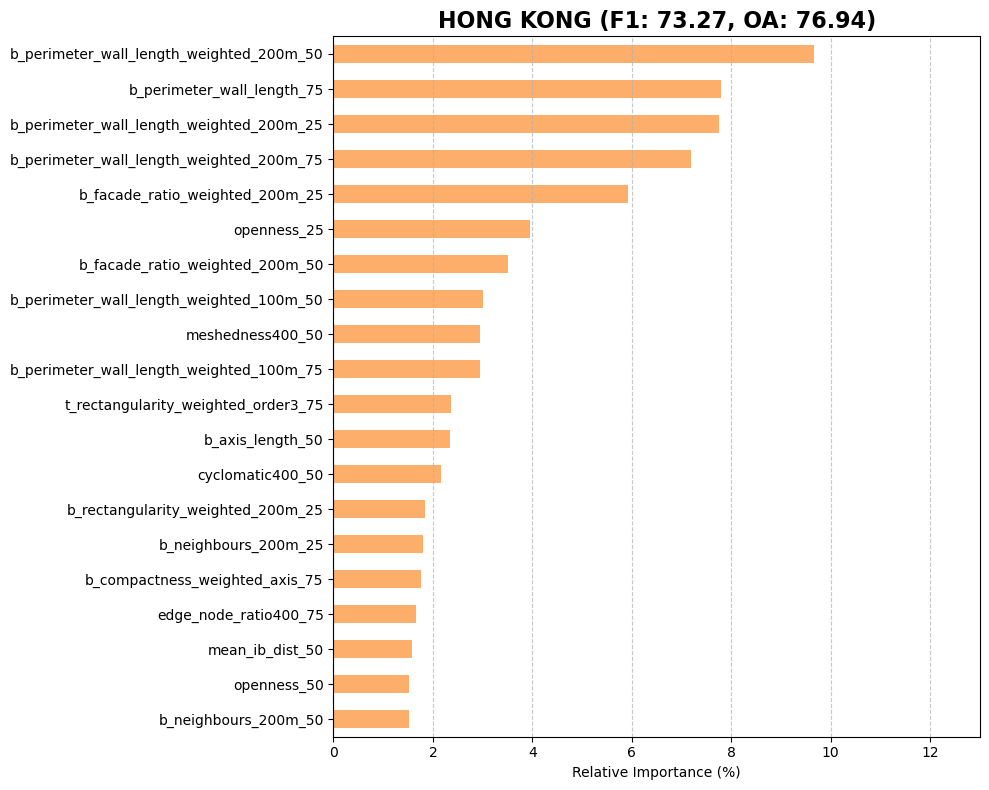

In [51]:
# get 20 most important morphometrics of the best non-weighted model
feature_importance = pd.Series(best_non_weighted_model.feature_importances_, index=best_non_weighted_model.feature_names_in_)
top_features = feature_importance.sort_values(ascending=False).head(20)
top_features_percent = top_features * 100

# figure
fig, ax = plt.subplots(figsize=(10, 8))
top_features_percent.sort_values().plot(kind='barh', color='#fdae6b', ax=ax)

ax.set_xlabel('Relative Importance (%)')
ax.set_title(f'HONG KONG (F1: {best_models_df.loc["non_weighted_model"]["wF1"].iloc[0]}, OA: {best_models_df.loc["non_weighted_model"]["OA"].iloc[0]})', fontweight='bold', fontsize=16)
ax.set_xlim(0, 13)
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
#plt.savefig('S1_hongkong_importances.png', dpi=300, bbox_inches='tight')
plt.show()

In [52]:
top_features_percent.to_csv(r'results\s1\hongkong_S1_top_features_non_weighted_model.csv')

In [ ]:
## rasterize
# filepath to Sentinel-2 imagery (raster to match)
imagery = r'imagery\hongkong_20180321.tif'

# output
output_path = r'rasterized_morphometrics\hongkong_rasterized_morphometrics_fold3.tif'

utils.rasterize_top20_morphometrics(imagery, output_path, data, best_non_weighted_model)

### Best RF weighted model

In [53]:
# choose the best weighted model
best_weighted_model = best_models_df.loc["weighted_model"].iloc[0]["Model"]

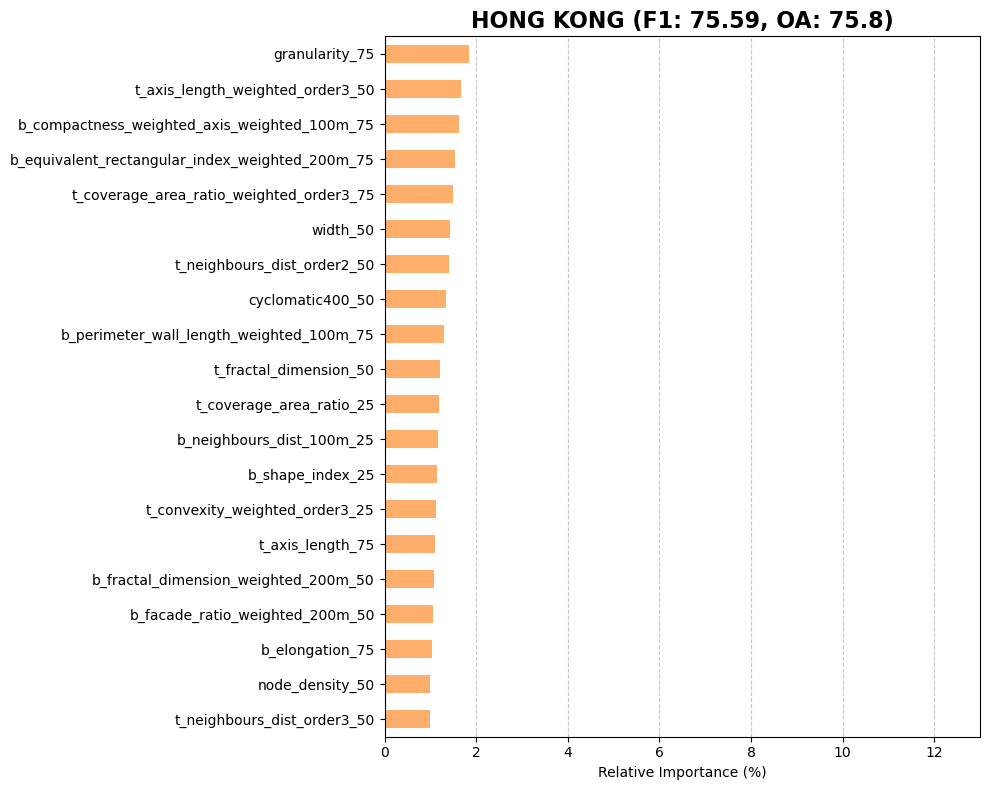

In [54]:
# get 20 most important morphometrics of the best weighted model
feature_importance = pd.Series(best_weighted_model.feature_importances_, index=best_weighted_model.feature_names_in_)
top_features = feature_importance.sort_values(ascending=False).head(20)
top_features_percent = top_features * 100

# figure
fig, ax = plt.subplots(figsize=(10, 8))
top_features_percent.sort_values().plot(kind='barh', color='#fdae6b', ax=ax)

ax.set_xlabel('Relative Importance (%)')
ax.set_title(f'HONG KONG (F1: {best_models_df.loc["weighted_model"]["wF1"].iloc[0]}, OA: {best_models_df.loc["weighted_model"]["OA"].iloc[0]})', fontweight='bold', fontsize=16)
ax.set_xlim(0, 13)
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [55]:
top_features_percent.to_csv(r'results\s1\hongkong_S1_top_features_weighted_model.csv')

In [ ]:
## rasterize
# filepath to Sentinel-2 imagery (raster to match)
imagery = r'imagery\hongkong_20180321.tif'

# output
output_path = r'rasterized_morphometrics\hongkong_rasterized_morphometrics_fold0_weighted.tif'

utils.rasterize_top20_morphometrics(imagery, output_path, data, best_weighted_model)

# Paris

## Data import

In [2]:
# load splited reference data
splited_ref_data = gpd.read_file(r'ref_data\paris_ref_splitS1.gpkg')

# load tessellation cells with morphometrics
data = gpd.read_parquet(r'momepy\paris_morphometrics.parquet')

In [3]:
# results[setup][strategy][fold]
results = {
    strat: {
        fold: {} for fold in folds
    } for strat in strategies
}

### Fold 0

In [5]:
fold=0
fold0_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [6]:
X_train = fold0_data["X_train"]
y_train = fold0_data["y_train"]
X_test = fold0_data["X_test"]
y_test = fold0_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=3, max_features=X_train.shape[1], class_weight=False)

In [ ]:
param, train, test, diff

In [7]:
model_fold0 = ensemble.RandomForestClassifier(random_state=seed, n_jobs=-1, max_depth=10, max_features=32, n_estimators=100)

model_fold0.fit(X_train, y_train)
pred_test = model_fold0.predict(X_test)

In [8]:
# training accuracy
pred_train = model_fold0.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  99.69
wF1 train:  99.69


In [9]:
# test accuracy
pred_test = model_fold0.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold0,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)

results["non_weighted_model"][fold] = accuracies

OA test:  94.93
wF1 test:  94.73


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [10]:
model_fold0_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=seed, n_jobs=-1, max_depth=36, max_features=46, n_estimators=100)

model_fold0_weighted.fit(X_train, y_train)
pred_test = model_fold0_weighted.predict(X_test)

In [11]:
# training accuracy
pred_train = model_fold0_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  99.96
wF1 train:  99.96


In [12]:
# test accuracy
pred_test = model_fold0_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold0_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)

results["weighted_model"][fold] = accuracies

OA test:  95.4
wF1 test:  94.92


### Fold 1

In [13]:
fold=1
fold1_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [14]:
X_train = fold1_data["X_train"]
y_train = fold1_data["y_train"]
X_test = fold1_data["X_test"]
y_test = fold1_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=False)

In [ ]:
param, train, test, diff

In [15]:
model_fold1 = ensemble.RandomForestClassifier(random_state=seed, n_jobs=-1, max_depth=7, max_features=8, n_estimators=100)

model_fold1.fit(X_train, y_train)
pred_test = model_fold1.predict(X_test)

In [16]:
# training accuracy
pred_train = model_fold1.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  98.4
wF1 train:  98.35


In [17]:
# test accuracy
pred_test = model_fold1.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold1,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)

results["non_weighted_model"][fold] = accuracies

OA test:  97.59
wF1 test:  97.09


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [18]:
model_fold1_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=seed, n_jobs=-1, max_depth=9, max_features=6, n_estimators=100)

model_fold1_weighted.fit(X_train, y_train)
pred_test = model_fold1_weighted.predict(X_test)

In [19]:
# training accuracy
pred_train = model_fold1_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  97.13
wF1 train:  97.3


In [20]:
# test accuracy
pred_test = model_fold1_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold1_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["weighted_model"][fold] = accuracies

OA test:  96.83
wF1 test:  96.88


### Fold 2

In [21]:
fold=2
fold2_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [22]:
X_train = fold2_data["X_train"]
y_train = fold2_data["y_train"]
X_test = fold2_data["X_test"]
y_test = fold2_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=False)

In [23]:
model_fold2 = ensemble.RandomForestClassifier(random_state=seed, n_jobs=-1, max_depth=1, max_features=5, n_estimators=100)

model_fold2.fit(X_train, y_train)
pred_test = model_fold2.predict(X_test)

In [24]:
# training accuracy
pred_train = model_fold2.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  92.3
wF1 train:  88.63


In [25]:
# test accuracy
pred_test = model_fold2.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold2,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["non_weighted_model"][fold] = accuracies

OA test:  87.15
wF1 test:  82.48


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [26]:
model_fold2_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=seed, n_jobs=-1, max_depth=7, max_features=51, n_estimators=100)

model_fold2_weighted.fit(X_train, y_train)
pred_test = model_fold2_weighted.predict(X_test)

In [27]:
# training accuracy
pred_train = model_fold2_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  95.94
wF1 train:  96.49


In [28]:
# test accuracy
pred_test = model_fold2_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold2_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["weighted_model"][fold] = accuracies

OA test:  91.76
wF1 test:  92.03


### Fold 3

In [29]:
fold=3
fold3_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [30]:
X_train = fold3_data["X_train"]
y_train = fold3_data["y_train"]
X_test = fold3_data["X_test"]
y_test = fold3_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=False)

In [ ]:
param, train, test, diff

In [31]:
model_fold3 = ensemble.RandomForestClassifier(random_state=seed, n_jobs=-1, max_depth=4, max_features=28, n_estimators=100)

model_fold3.fit(X_train, y_train)
pred_test = model_fold3.predict(X_test)

In [32]:
# training accuracy
pred_train = model_fold3.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  96.73
wF1 train:  96.28


In [33]:
# test accuracy
pred_test = model_fold3.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold3,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["non_weighted_model"][fold] = accuracies

OA test:  91.86
wF1 test:  91.11


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=6, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [34]:
model_fold3_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=seed, n_jobs=-1, max_depth=1, max_features=13, n_estimators=100)

model_fold3_weighted.fit(X_train, y_train)
pred_test = model_fold3_weighted.predict(X_test)

In [35]:
# training accuracy
pred_train = model_fold3_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  88.69
wF1 train:  89.54


In [36]:
# test accuracy
pred_test = model_fold3_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold3_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["weighted_model"][fold] = accuracies

OA test:  80.16
wF1 test:  83.38


### Fold 4

In [37]:
fold=4
fold4_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [38]:
X_train = fold4_data["X_train"]
y_train = fold4_data["y_train"]
X_test = fold4_data["X_test"]
y_test = fold4_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=False)

In [ ]:
param, train, test, diff

In [39]:
model_fold4 = ensemble.RandomForestClassifier(random_state=seed, n_jobs=-1, max_depth=7, max_features=78, n_estimators=100)

model_fold4.fit(X_train, y_train)
pred_test = model_fold4.predict(X_test)

In [40]:
# training accuracy
pred_train = model_fold4.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  99.14
wF1 train:  99.11


In [41]:
# test accuracy
pred_test = model_fold4.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold4,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)

results["non_weighted_model"][fold] = accuracies

OA test:  94.37
wF1 test:  93.88


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=6, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [42]:
model_fold4_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=seed, n_jobs=-1, max_depth=9, max_features=14, n_estimators=100)

model_fold4_weighted.fit(X_train, y_train)
pred_test = model_fold4_weighted.predict(X_test)

In [43]:
# training accuracy
pred_train = model_fold4_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  98.09
wF1 train:  98.22


In [44]:
# test accuracy
pred_test = model_fold4_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold4_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["weighted_model"][fold] = accuracies

OA test:  95.42
wF1 test:  95.53


## Evaluation

In [45]:
df = pd.DataFrame.from_dict({
    (i, j): results[i][j] 
    for i in results.keys() 
    for j in results[i].keys() 
}, orient='index')

df.index.names = ["Strategy", "Fold"]
df

OA    wF1  \
Strategy           Fold                 
non_weighted_model 0     94.93  94.73   
                   1     97.59  97.09   
                   2     87.15  82.48   
                   3     91.86  91.11   
                   4     94.37  93.88   
weighted_model     0     95.40  94.92   
                   1     96.83  96.88   
                   2     91.76  92.03   
                   3     80.16  83.38   
                   4     95.42  95.53   

                                                                     Model  \
Strategy           Fold                                                      
non_weighted_model 0     (DecisionTreeClassifier(max_depth=10, max_feat...   
                   1     (DecisionTreeClassifier(max_depth=7, max_featu...   
                   2     (DecisionTreeClassifier(max_depth=1, max_featu...   
                   3     (DecisionTreeClassifier(max_depth=4, max_featu...   
                   4     (DecisionTreeClassifier(max_depth=7, max_featu...   
weighted_model     0     (DecisionTreeClassifier(max_depth=36, max_feat...   
                   1     (DecisionTreeClassifier(max_depth=9, max_featu...   
                   2     (DecisionTreeClassifier(max_depth=7, max_featu...   
                   3     (DecisionTreeClassifier(max_depth=1, max_featu...   
                   4     (DecisionTreeClassifier(max_depth=9, max_featu...   

                                                          Confusion_Matrix  \
Strategy           Fold                                                      
non_weighted_model 0     [[7, 0, 0, 3, 0, 9, 0], [0, 4771, 5, 42, 0, 0,...   
                   1     [[0, 0, 28, 45, 0, 13, 0], [0, 29098, 68, 8, 0...   
                   2     [[0, 0, 0, 0, 0, 0, 0], [0, 3241, 0, 0, 334, 0...   
                   3     [[0, 0, 0, 0, 0, 0, 0], [0, 2825, 22, 29, 0, 0...   
                   4     [[0, 0, 0, 0, 0, 0, 0], [0, 3266, 0, 0, 0, 0, ...   
weighted_model     0     [[12, 0, 0, 1, 0, 6, 0], [0, 4787, 27, 4, 0, 0...   
                   1     [[1, 0, 8, 56, 0, 21, 0], [0, 28693, 482, 1, 0...   
                   2     [[0, 0, 0, 0, 0, 0, 0], [0, 2893, 29, 292, 361...   
                   3     [[0, 0, 0, 0, 0, 0, 0], [70, 2646, 154, 5, 0, ...   
                   4     [[0, 0, 0, 0, 0, 0, 0], [0, 3266, 0, 0, 0, 0, ...   

                         F1_Class_1  F1_Class_2  F1_Class_3  F1_Class_4  \
Strategy           Fold                                                   
non_weighted_model 0          35.90       96.82         NaN       52.51   
                   1           0.00       99.76         NaN       39.84   
                   2            NaN       86.70         NaN        0.00   
                   3            NaN       94.36         NaN        3.21   
                   4            NaN       96.06         NaN       71.24   
weighted_model     0          54.55       96.90         NaN       42.22   
                   1           2.30       99.09         NaN       33.96   
                   2            NaN       87.57         NaN       63.58   
                   3            NaN       85.24         NaN       38.13   
                   4            NaN       99.21         NaN       69.65   

                         F1_Class_5  F1_Class_6  F1_Class_7  F1_Class_8  \
Strategy           Fold                                                   
non_weighted_model 0          67.82       97.79         NaN       94.60   
                   1          50.15       97.59         NaN       54.24   
                   2           0.00       93.32         NaN        0.00   
                   3          46.55       96.85         NaN       92.01   
                   4          70.21       97.66         NaN       87.33   
weighted_model     0          69.57       98.35         NaN       93.88   
                   1          53.11       98.34         NaN       54.86   
                   2          72.33       96.24         NaN       94.88   
          

In [46]:
# mean metrics across folds
df_metrics = df.drop(columns=["Model","Confusion_Matrix"])
averages = df_metrics.groupby(["Strategy"]).mean().round(2)
averages

,OA,wF1,F1_Class_1,F1_Class_2,F1_Class_3,F1_Class_4,F1_Class_5,F1_Class_6,F1_Class_7,F1_Class_8,F1_Class_9,F1_Class_10
Strategy,,,,,,,,,,,,
non_weighted_model,93.18,91.86,17.95,94.74,NaN,33.36,46.95,96.64,NaN,65.64,12.78,NaN
weighted_model,91.91,92.55,28.42,93.60,NaN,49.51,60.34,96.06,NaN,83.73,12.66,NaN


In [46]:
# export results
df_metrics.to_csv(r"results\s1\paris_S1_results.csv")

## Confusion Matrix

In [47]:
better_strategy = df.groupby("Strategy")["wF1"].mean().idxmax()
better_strategy

'weighted_model'

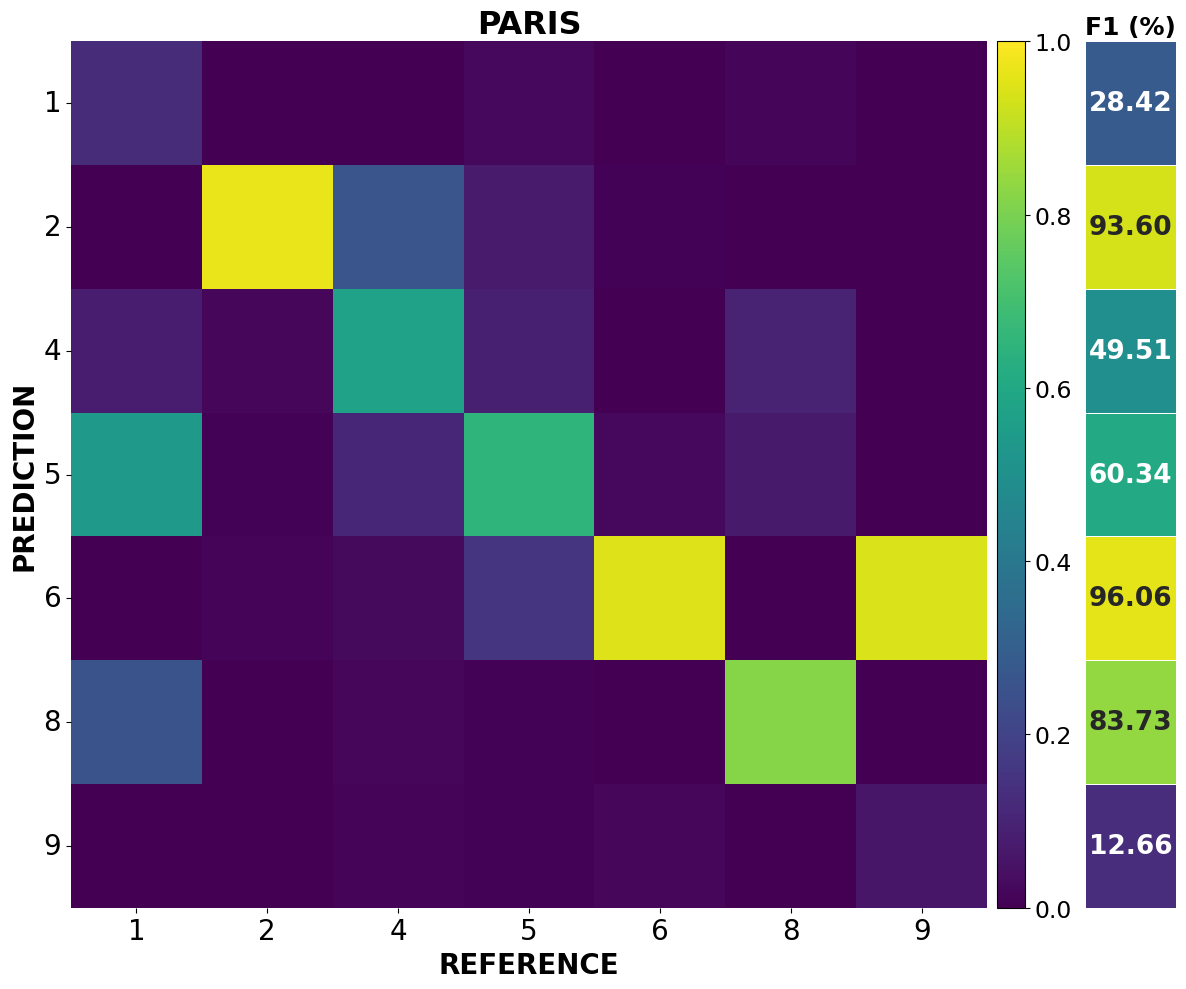

In [48]:
ordered_labels = sorted(splited_ref_data['gridcode'].unique())
stats_row = averages.loc[better_strategy]
f1_values = []
for label in ordered_labels:
    col_name = f"F1_Class_{label}"
    val = stats_row.get(col_name, np.nan)
    f1_values.append(val)

f1_matrix = np.array(f1_values).reshape(-1, 1)

total_cm = None
for fold in results[better_strategy]:
    fold_cm = results[better_strategy][fold]["Confusion_Matrix"]
    if total_cm is None:
        total_cm = fold_cm.copy()
    else:
        total_cm += fold_cm

row_sums = total_cm.sum(axis=1)[:, np.newaxis]
norm_cm = total_cm.astype('float') / (row_sums + 1e-10)
plot_matrix = norm_cm.T 

# Create Figure
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(plot_matrix, 
            annot=False, 
            fmt='.2f', 
            cmap='viridis', 
            vmin=0.0, 
            vmax=1.0, 
            xticklabels=ordered_labels, 
            yticklabels=ordered_labels,
            cbar=False, 
            ax=ax)
divider = make_axes_locatable(ax)
# colorbar
cax = divider.append_axes("right", size="3%", pad=0.1)
plt.colorbar(ax.collections[0], cax=cax)
cax.tick_params(labelsize=17)
# f1
f1_ax = divider.append_axes("right", size="10%", pad=0.6)
sns.heatmap(f1_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='viridis', 
            cbar=False,   
            xticklabels=[],
            yticklabels=[], 
            ax=f1_ax,
            vmin=0, vmax=100,
           annot_kws={'size': 19, 'weight': 'bold'},
           linewidths=.7,
            linecolor='white')
f1_ax.set_title("F1 (%)", fontsize=18, fontweight='bold', pad=5)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20, rotation=0)
ax.set_xlabel('REFERENCE', fontsize=20, fontweight='bold')
ax.set_ylabel('PREDICTION', fontsize=20, fontweight='bold')
ax.set_title('PARIS', fontweight='bold', fontsize=23)
plt.tight_layout()
plt.savefig(r'figures\S1_paris_matrix_v2.png', dpi=500, bbox_inches='tight')
plt.show()

In [49]:
np.save(r"results\s1\paris_S1_summed_cm.npy", total_cm)

## Prediction

In [57]:
better_strategy = df.groupby("Strategy")["wF1"].mean().idxmax()
better_strategy

'weighted_model'

In [58]:
models = df.loc[better_strategy, "Model"].tolist()
models

[RandomForestClassifier(class_weight='balanced', max_depth=36, max_features=46,
                        n_jobs=-1, random_state=0),
 RandomForestClassifier(class_weight='balanced', max_depth=9, max_features=6,
                        n_jobs=-1, random_state=0),
 RandomForestClassifier(class_weight='balanced', max_depth=7, max_features=51,
                        n_jobs=-1, random_state=0),
 RandomForestClassifier(class_weight='balanced', max_depth=1, max_features=13,
                        n_jobs=-1, random_state=0),
 RandomForestClassifier(class_weight='balanced', max_depth=9, max_features=14,
                        n_jobs=-1, random_state=0)]

In [ ]:
data_for_pred = data.drop(['focal', 'geometry'], axis=1)
for f, m in enumerate(models):
    pred = m.predict(data_for_pred)
    classified = data['geometry']
    classified = gpd.GeoDataFrame(classified)
    classified['class'] = pred
    classified.to_parquet(fr"outputs\s1\paris_S1_fold{folds[f]}.parquet", compression='zstd')
    print(fr"outputs\s1\paris_S1_fold{folds[f]}.parquet saved")

## Aggregation to 100m

In [ ]:
for fold in folds:
    input_filename = fr"outputs\s1\paris_S1_fold{fold}.parquet"
    output_filename = fr"outputs\s1\paris_S1_fold{fold}_100m.parquet"
    utils.aggregate(input_filename, "class", 100, output_filename)

In [66]:
aggr_results = []
for fold in folds:
    pred_path = fr"outputs\s1\paris_S1_fold{fold}_100m.parquet"
    pred_gdf = gpd.read_parquet(pred_path)
    
    test_polygons = splited_ref_data[splited_ref_data["fold"] == fold].copy()
    
    pred_centroids = pred_gdf.copy()
    pred_centroids['geometry'] = pred_centroids.centroid
    
    joined = gpd.sjoin(pred_centroids, test_polygons, how='left', predicate='within')
    
    if 'gridcode' in joined.columns:
        joined = joined.rename(columns={'gridcode': 'y_true'})
    else:
        print(f"Fold {fold}: No grid centers fell inside test polygons")
        continue

    valid_data = joined.dropna(subset=['class', 'y_true'])
    
    y_pred = valid_data['class']
    y_true = valid_data['y_true']
    
    if len(y_true) == 0:
        print(f"Fold {fold}: No valid data")
        continue

    oa = metrics.accuracy_score(y_true, y_pred)
    wf1 = metrics.f1_score(y_true, y_pred, average='weighted')
    
    current_labels = sorted(list(set(y_true) | set(y_pred)))
    f1_per_class = metrics.f1_score(y_true, y_pred, average=None, labels=current_labels)
    
    fold_res = {
        'Fold': fold,
        'OA': round(oa*100,2),
        'wF1': round(wf1*100,2)
    }

    for c in all_possible_classes:
        fold_res[f"F1_Class_{c}"] = np.nan
    
    for label, score in zip(current_labels, f1_per_class):
        if label in all_possible_classes:
            fold_res[f"F1_Class_{int(label)}"] = round(score * 100, 2)
        
    aggr_results.append(fold_res)

In [67]:
aggregated_res_df = pd.DataFrame(aggr_results).set_index("Fold")
aggregated_res_df

,OA,wF1,F1_Class_1,F1_Class_2,F1_Class_3,F1_Class_4,F1_Class_5,F1_Class_6,F1_Class_7,F1_Class_8,F1_Class_9,F1_Class_10
Fold,,,,,,,,,,,,
0,89.71,88.35,34.48,94.68,NaN,58.99,73.05,96.62,NaN,90.46,30.30,NaN
1,92.29,92.17,0.00,98.09,NaN,43.97,46.67,95.55,NaN,88.89,22.86,NaN
2,90.24,90.76,0.00,89.97,NaN,79.01,67.10,95.46,NaN,95.80,0.00,NaN
3,67.34,71.21,0.00,83.53,NaN,51.75,18.63,80.05,NaN,95.08,0.00,NaN
4,92.06,92.89,NaN,99.69,NaN,82.12,62.96,96.39,NaN,93.68,NaN,NaN


In [69]:
aggregated_res_df.to_csv(r"results\s1\paris_S1_aggregated_results.csv")

## Rasterization of top morphometrics

For fusion-based predictions (S3-S4) rasterize top 20 most important morphometrics of the best non-weighted and weighted model (determined by model's F1).

In [51]:
best_models_df = df.sort_values("wF1", ascending=False).groupby("Strategy").head(1)
best_models_df

,,OA,wF1,Model,Confusion_Matrix,F1_Class_1,F1_Class_2,F1_Class_3,F1_Class_4,F1_Class_5,F1_Class_6,F1_Class_7,F1_Class_8,F1_Class_9,F1_Class_10
Strategy,Fold,,,,,,,,,,,,,,
non_weighted_model,1,97.59,97.09,"(DecisionTreeClassifier(max_depth=7, max_featu...","[[0, 0, 28, 45, 0, 13, 0], [0, 29098, 68, 8, 0...",0.0,99.76,NaN,39.84,50.15,97.59,NaN,54.24,0.00,NaN
weighted_model,1,96.83,96.88,"(DecisionTreeClassifier(max_depth=9, max_featu...","[[1, 0, 8, 56, 0, 21, 0], [0, 28693, 482, 1, 0...",2.3,99.09,NaN,33.96,53.11,98.34,NaN,54.86,3.94,NaN


### Best non-weighted RF model

In [52]:
# select the best non-weighted model
best_non_weighted_model = best_models_df.loc["non_weighted_model"].iloc[0]["Model"]

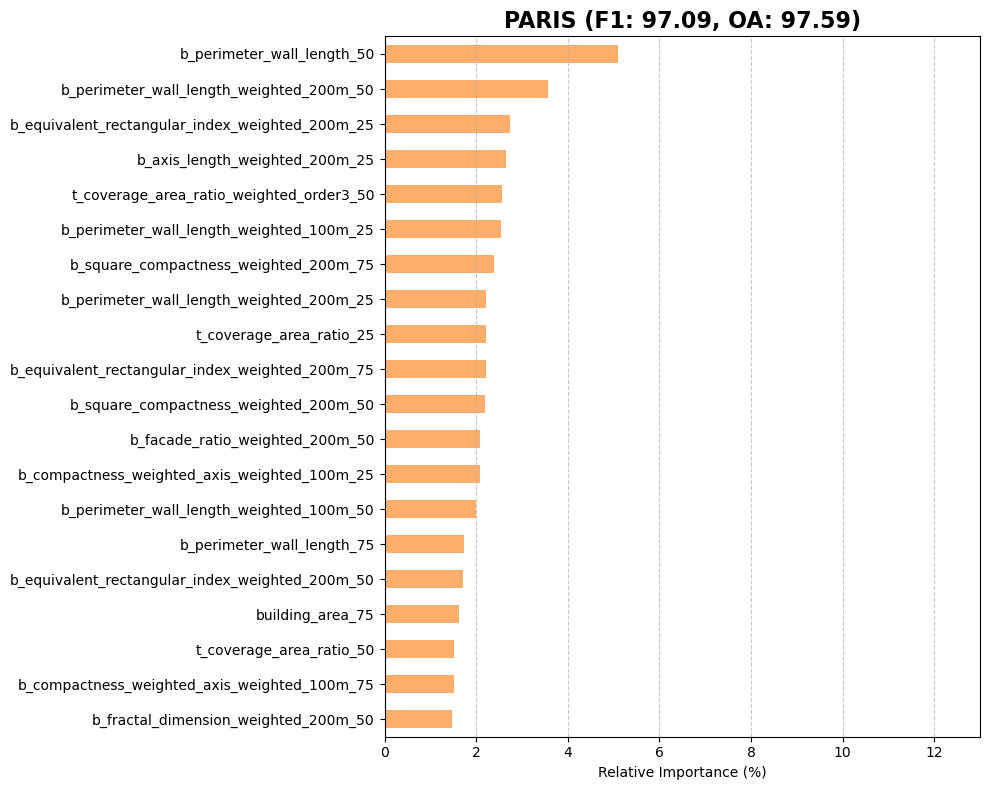

In [53]:
# get 20 most important morphometrics of the best non-weighted model
feature_importance = pd.Series(best_non_weighted_model.feature_importances_, index=best_non_weighted_model.feature_names_in_)
top_features = feature_importance.sort_values(ascending=False).head(20)
top_features_percent = top_features * 100

# figure
fig, ax = plt.subplots(figsize=(10, 8))
top_features_percent.sort_values().plot(kind='barh', color='#fdae6b', ax=ax)

ax.set_xlabel('Relative Importance (%)')
ax.set_title(f'PARIS (F1: {best_models_df.loc["non_weighted_model"]["wF1"].iloc[0]}, OA: {best_models_df.loc["non_weighted_model"]["OA"].iloc[0]})', fontweight='bold', fontsize=16)
ax.set_xlim(0, 13)
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
#plt.savefig('S1_paris_importances.png', dpi=300, bbox_inches='tight')
plt.show()

In [54]:
top_features_percent.to_csv(r'results\s1\paris_S1_top_features_non_weighted_model.csv')

In [ ]:
## rasterize
# filepath to Sentinel-2 imagery (raster to match)
imagery = r'imagery\paris_20170526.tif'

# output
output_path = r'rasterized_morphometrics\paris_rasterized_morphometrics_fold1.tif'

utils.rasterize_top20_morphometrics(imagery, output_path, data, best_non_weighted_model)

### Best RF weighted model

In [55]:
# choose the best weighted model
best_weighted_model = best_models_df.loc["weighted_model"].iloc[0]["Model"]

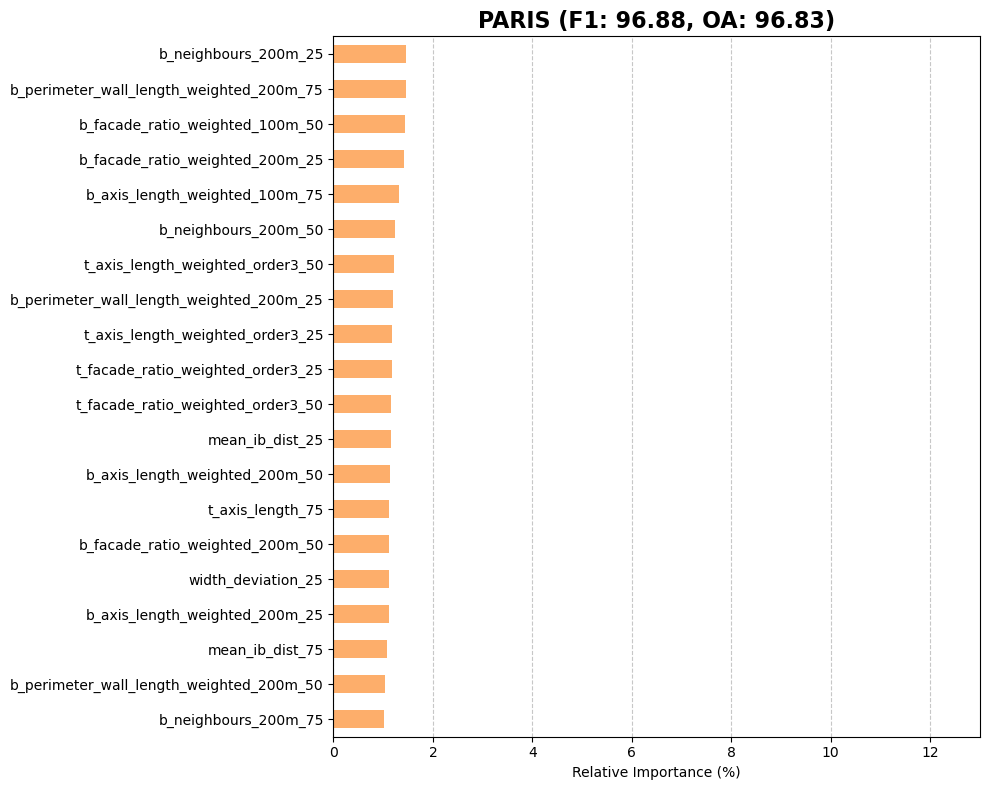

In [56]:
# get 20 most important morphometrics of the best weighted model
feature_importance = pd.Series(best_weighted_model.feature_importances_, index=best_weighted_model.feature_names_in_)
top_features = feature_importance.sort_values(ascending=False).head(20)
top_features_percent = top_features * 100

# figure
fig, ax = plt.subplots(figsize=(10, 8))
top_features_percent.sort_values().plot(kind='barh', color='#fdae6b', ax=ax)

ax.set_xlabel('Relative Importance (%)')
ax.set_title(f'PARIS (F1: {best_models_df.loc["weighted_model"]["wF1"].iloc[0]}, OA: {best_models_df.loc["weighted_model"]["OA"].iloc[0]})', fontweight='bold', fontsize=16)
ax.set_xlim(0, 13)
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [57]:
top_features_percent.to_csv(r'results\s1\paris_S1_top_features_weighted_model.csv')

In [ ]:
## rasterize them
# filepath to Sentinel-2 imagery (raster to match)
imagery = r'imagery\paris_20170526.tif'

# output
output_path = r'rasterized_morphometrics\paris_rasterized_morphometrics_fold1_weighted.tif'

utils.rasterize_top20_morphometrics(imagery, output_path, data, best_weighted_model)

# Rome

## Data import

In [2]:
# load splited reference data
splited_ref_data = gpd.read_file(r'ref_data\rome_ref_splitS1.gpkg')

# load tessellation cells with morphometrics
data = gpd.read_parquet(r'momepy\rome_morphometrics.parquet')

In [3]:
# results[setup][strategy][fold]
results = {
    strat: {
        fold: {} for fold in folds
    } for strat in strategies
}

### Fold 0

In [4]:
fold=0
fold0_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [5]:
X_train = fold0_data["X_train"]
y_train = fold0_data["y_train"]
X_test = fold0_data["X_test"]
y_test = fold0_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=3, max_features=X_train.shape[1], class_weight=False)

In [ ]:
param, train, test, diff

In [6]:
model_fold0 = ensemble.RandomForestClassifier(random_state=1, n_jobs=-1, max_depth=1, max_features=1, n_estimators=100)

model_fold0.fit(X_train, y_train)
pred_test = model_fold0.predict(X_test)

In [7]:
# training accuracy
pred_train = model_fold0.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  59.03
wF1 train:  44.14


In [8]:
# test accuracy
pred_test = model_fold0.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold0,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)

results["non_weighted_model"][fold] = accuracies

OA test:  45.79
wF1 test:  28.76


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [9]:
model_fold0_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=1, n_jobs=-1, max_depth=1, max_features=17, n_estimators=100)

model_fold0_weighted.fit(X_train, y_train)
pred_test = model_fold0_weighted.predict(X_test)

In [10]:
# training accuracy
pred_train = model_fold0_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  43.51
wF1 train:  48.41


In [11]:
# test accuracy
pred_test = model_fold0_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold0_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)

results["weighted_model"][fold] = accuracies

OA test:  46.25
wF1 test:  43.62


### Fold 1

In [12]:
fold=1
fold1_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [13]:
X_train = fold1_data["X_train"]
y_train = fold1_data["y_train"]
X_test = fold1_data["X_test"]
y_test = fold1_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=False)

In [ ]:
param, train, test, diff

In [14]:
model_fold1 = ensemble.RandomForestClassifier(random_state=1, n_jobs=-1, max_depth=3, max_features=1, n_estimators=100)

model_fold1.fit(X_train, y_train)
pred_test = model_fold1.predict(X_test)

In [15]:
# training accuracy
pred_train = model_fold1.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  66.18
wF1 train:  57.46


In [16]:
# test accuracy
pred_test = model_fold1.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold1,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)

results["non_weighted_model"][fold] = accuracies

OA test:  61.75
wF1 test:  50.13


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [17]:
model_fold1_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=1, n_jobs=-1, max_depth=4, max_features=29, n_estimators=100)

model_fold1_weighted.fit(X_train, y_train)
pred_test = model_fold1_weighted.predict(X_test)

In [18]:
# training accuracy
pred_train = model_fold1_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  75.54
wF1 train:  76.8


In [19]:
# test accuracy
pred_test = model_fold1_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold1_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["weighted_model"][fold] = accuracies

OA test:  72.39
wF1 test:  71.98


### Fold 2

In [20]:
fold=2
fold2_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [21]:
X_train = fold2_data["X_train"]
y_train = fold2_data["y_train"]
X_test = fold2_data["X_test"]
y_test = fold2_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=False)

In [22]:
model_fold2 = ensemble.RandomForestClassifier(random_state=1, n_jobs=-1, max_depth=5, max_features=135, n_estimators=100)

model_fold2.fit(X_train, y_train)
pred_test = model_fold2.predict(X_test)

In [23]:
# training accuracy
pred_train = model_fold2.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  90.07
wF1 train:  89.74


In [24]:
# test accuracy
pred_test = model_fold2.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold2,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["non_weighted_model"][fold] = accuracies

OA test:  86.89
wF1 test:  86.2


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [25]:
model_fold2_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=1, n_jobs=-1, max_depth=6, max_features=8, n_estimators=100)

model_fold2_weighted.fit(X_train, y_train)
pred_test = model_fold2_weighted.predict(X_test)

In [26]:
# training accuracy
pred_train = model_fold2_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  79.77
wF1 train:  80.49


In [27]:
# test accuracy
pred_test = model_fold2_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold2_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["weighted_model"][fold] = accuracies

OA test:  79.03
wF1 test:  79.85


### Fold 3

In [28]:
fold=3
fold3_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [29]:
X_train = fold3_data["X_train"]
y_train = fold3_data["y_train"]
X_test = fold3_data["X_test"]
y_test = fold3_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=False)

In [ ]:
param, train, test, diff

In [30]:
model_fold3 = ensemble.RandomForestClassifier(random_state=1, n_jobs=-1, max_depth=2, max_features=270, n_estimators=100)

model_fold3.fit(X_train, y_train)
pred_test = model_fold3.predict(X_test)

In [31]:
# training accuracy
pred_train = model_fold3.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  76.45
wF1 train:  73.8


In [32]:
# test accuracy
pred_test = model_fold3.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold3,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["non_weighted_model"][fold] = accuracies

OA test:  74.17
wF1 test:  70.89


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=6, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [33]:
model_fold3_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=1, n_jobs=-1, max_depth=3, max_features=162, n_estimators=100)

model_fold3_weighted.fit(X_train, y_train)
pred_test = model_fold3_weighted.predict(X_test)

In [34]:
# training accuracy
pred_train = model_fold3_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  59.92
wF1 train:  55.2


In [35]:
# test accuracy
pred_test = model_fold3_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold3_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["weighted_model"][fold] = accuracies

OA test:  59.59
wF1 test:  55.16


### Fold 4

In [36]:
fold=4
fold4_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [37]:
X_train = fold4_data["X_train"]
y_train = fold4_data["y_train"]
X_test = fold4_data["X_test"]
y_test = fold4_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=False)

In [ ]:
param, train, test, diff

In [38]:
model_fold4 = ensemble.RandomForestClassifier(random_state=1, n_jobs=-1, max_depth=4, max_features=27, n_estimators=100)

model_fold4.fit(X_train, y_train)
pred_test = model_fold4.predict(X_test)

In [39]:
# training accuracy
pred_train = model_fold4.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  86.65
wF1 train:  85.83


In [40]:
# test accuracy
pred_test = model_fold4.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold4,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)

results["non_weighted_model"][fold] = accuracies

OA test:  85.69
wF1 test:  85.2


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=6, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [41]:
model_fold4_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=1, n_jobs=-1, max_depth=1, max_features=19, n_estimators=100)

model_fold4_weighted.fit(X_train, y_train)
pred_test = model_fold4_weighted.predict(X_test)

In [42]:
# training accuracy
pred_train = model_fold4_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  62.17
wF1 train:  55.98


In [43]:
# test accuracy
pred_test = model_fold4_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold4_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["weighted_model"][fold] = accuracies

OA test:  60.55
wF1 test:  60.82


## Evaluation

In [44]:
df = pd.DataFrame.from_dict({
    (i, j): results[i][j] 
    for i in results.keys() 
    for j in results[i].keys() 
}, orient='index')

df.index.names = ["Strategy", "Fold"]
df

OA    wF1  \
Strategy           Fold                 
non_weighted_model 0     45.79  28.76   
                   1     61.75  50.13   
                   2     86.89  86.20   
                   3     74.17  70.89   
                   4     85.69  85.20   
weighted_model     0     46.25  43.62   
                   1     72.39  71.98   
                   2     79.03  79.85   
                   3     59.59  55.16   
                   4     60.55  60.82   

                                                                     Model  \
Strategy           Fold                                                      
non_weighted_model 0     (DecisionTreeClassifier(max_depth=1, max_featu...   
                   1     (DecisionTreeClassifier(max_depth=3, max_featu...   
                   2     (DecisionTreeClassifier(max_depth=5, max_featu...   
                   3     (DecisionTreeClassifier(max_depth=2, max_featu...   
                   4     (DecisionTreeClassifier(max_depth=4, max_featu...   
weighted_model     0     (DecisionTreeClassifier(max_depth=1, max_featu...   
                   1     (DecisionTreeClassifier(max_depth=4, max_featu...   
                   2     (DecisionTreeClassifier(max_depth=6, max_featu...   
                   3     (DecisionTreeClassifier(max_depth=3, max_featu...   
                   4     (DecisionTreeClassifier(max_depth=1, max_featu...   

                                                          Confusion_Matrix  \
Strategy           Fold                                                      
non_weighted_model 0     [[1956, 0, 0, 0, 0, 0], [814, 0, 0, 0, 0, 0], ...   
                   1     [[2667, 0, 0, 0, 0, 0], [322, 0, 0, 0, 0, 0], ...   
                   2     [[2253, 0, 148, 1, 0, 0], [0, 0, 0, 0, 0, 0], ...   
                   3     [[2005, 0, 86, 14, 0, 0], [0, 0, 0, 0, 0, 0], ...   
                   4     [[2015, 0, 47, 0, 0, 0], [0, 0, 0, 0, 0, 0], [...   
weighted_model     0     [[999, 712, 99, 131, 15, 0], [119, 561, 0, 134...   
                   1     [[2197, 166, 226, 78, 0, 0], [49, 268, 4, 1, 0...   
                   2     [[1871, 2, 500, 29, 0, 0], [0, 0, 0, 0, 0, 0],...   
                   3     [[1930, 138, 37, 0, 0, 0], [0, 0, 0, 0, 0, 0],...   
                   4     [[1442, 383, 160, 0, 77, 0], [0, 0, 0, 0, 0, 0...   

                         F1_Class_1  F1_Class_2  F1_Class_3  F1_Class_4  \
Strategy           Fold                                                   
non_weighted_model 0            NaN       62.81        0.00         NaN   
                   1            NaN       75.99        0.00         NaN   
                   2            NaN       95.61         NaN         NaN   
                   3            NaN       85.32         NaN         NaN   
                   4            NaN       95.02         NaN         NaN   
weighted_model     0            NaN       55.94       47.20         NaN   
                   1            NaN       80.42       58.32         NaN   
                   2            NaN       87.39         NaN         NaN   
                   3            NaN       81.92         NaN         NaN   
                   4            NaN       72.34         NaN         NaN   

                         F1_Class_5  F1_Class_6  F1_Class_7  F1_Class_8  \
Strategy           Fold                                                   
non_weighted_model 0           0.00        0.00         NaN        0.00   
                   1          22.92        0.00         NaN        0.00   
                   2          78.46       52.45         NaN       90.00   
                   3          43.44       76.76         NaN        0.00   
                   4          74.00       68.98         NaN       69.34   
weighted_model     0           7.49       44.84         NaN       93.82   
                   1          60.07       40.00         NaN       96.04   
                   2          70.63       58.95         NaN       84.33   
          

In [45]:
# mean metrics across folds
df_metrics = df.drop(columns=["Model","Confusion_Matrix"])
averages = df_metrics.groupby(["Strategy"]).mean().round(2)
averages

,OA,wF1,F1_Class_1,F1_Class_2,F1_Class_3,F1_Class_4,F1_Class_5,F1_Class_6,F1_Class_7,F1_Class_8,F1_Class_9,F1_Class_10
Strategy,,,,,,,,,,,,
non_weighted_model,70.86,64.24,NaN,82.95,0.00,NaN,43.76,39.64,NaN,31.87,NaN,0.0
weighted_model,63.56,62.29,NaN,75.60,52.76,NaN,42.02,32.18,NaN,86.69,NaN,100.0


In [54]:
# export results
df_metrics.to_csv(r"results\s1\rome_S1_results.csv")

## Confusion Matrix

In [46]:
better_strategy = df.groupby("Strategy")["wF1"].mean().idxmax()
better_strategy

'non_weighted_model'

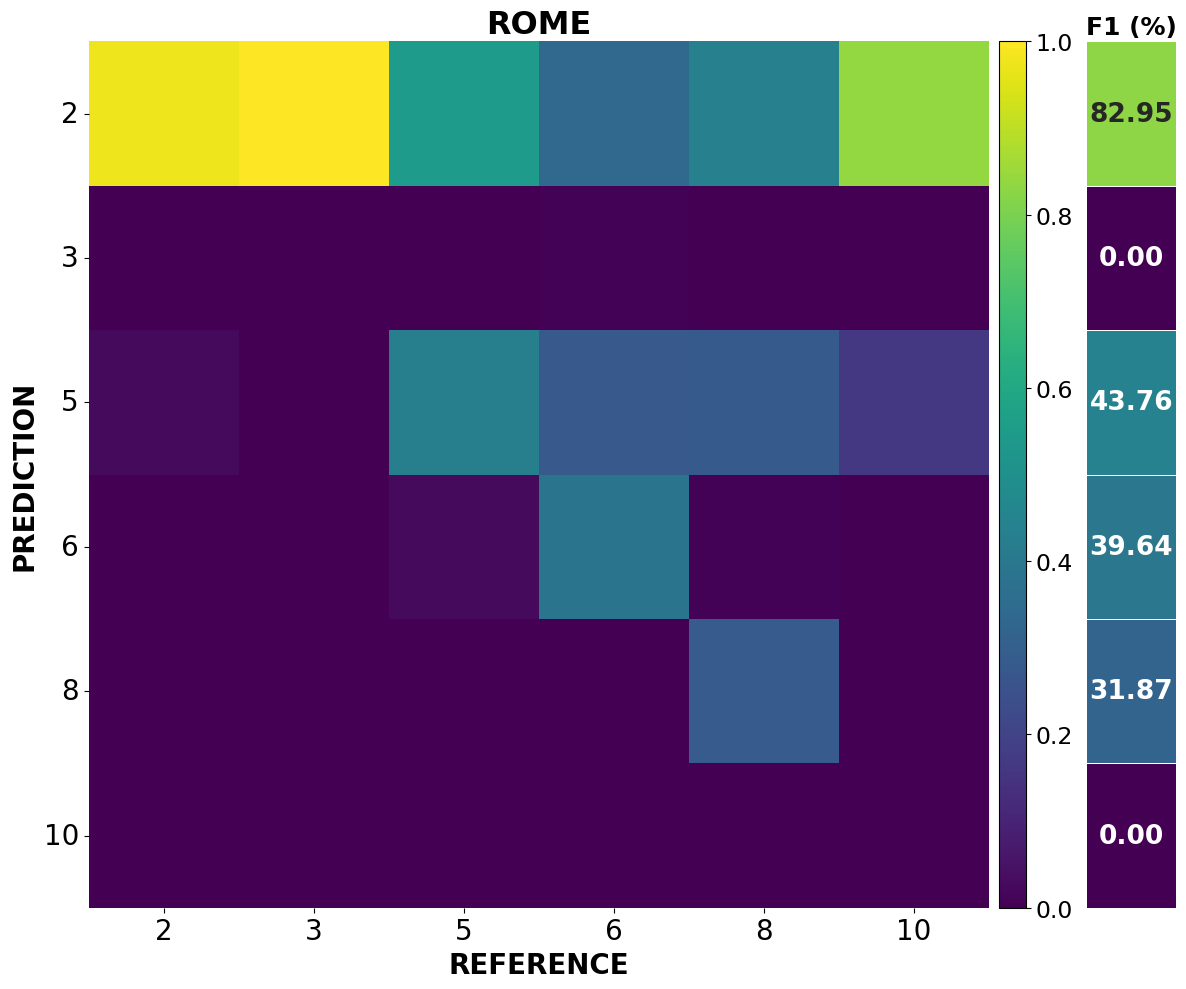

In [47]:
ordered_labels = sorted(splited_ref_data['gridcode'].unique())
stats_row = averages.loc[better_strategy]
f1_values = []
for label in ordered_labels:
    col_name = f"F1_Class_{label}"
    val = stats_row.get(col_name, np.nan)
    f1_values.append(val)

f1_matrix = np.array(f1_values).reshape(-1, 1)

total_cm = None
for fold in results[better_strategy]:
    fold_cm = results[better_strategy][fold]["Confusion_Matrix"]
    if total_cm is None:
        total_cm = fold_cm.copy()
    else:
        total_cm += fold_cm

row_sums = total_cm.sum(axis=1)[:, np.newaxis]
norm_cm = total_cm.astype('float') / (row_sums + 1e-10)
plot_matrix = norm_cm.T 

# Create Figure
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(plot_matrix, 
            annot=False, 
            fmt='.2f', 
            cmap='viridis', 
            vmin=0.0, 
            vmax=1.0, 
            xticklabels=ordered_labels, 
            yticklabels=ordered_labels,
            cbar=False, 
            ax=ax)
divider = make_axes_locatable(ax)
# colorbar
cax = divider.append_axes("right", size="3%", pad=0.1)
plt.colorbar(ax.collections[0], cax=cax)
cax.tick_params(labelsize=17)
# f1
f1_ax = divider.append_axes("right", size="10%", pad=0.6)
sns.heatmap(f1_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='viridis', 
            cbar=False,   
            xticklabels=[],
            yticklabels=[], 
            ax=f1_ax,
            vmin=0, vmax=100,
           annot_kws={'size': 19, 'weight': 'bold'},
           linewidths=.7,
            linecolor='white')
f1_ax.set_title("F1 (%)", fontsize=18, fontweight='bold', pad=5)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20, rotation=0)
ax.set_xlabel('REFERENCE', fontsize=20, fontweight='bold')
ax.set_ylabel('PREDICTION', fontsize=20, fontweight='bold')
ax.set_title('ROME', fontweight='bold', fontsize=23)
plt.tight_layout()
plt.savefig(r'figures\S1_rome_matrix_v2.png', dpi=500, bbox_inches='tight')
plt.show()

In [48]:
np.save(r"results\s1\rome_S1_summed_cm.npy", total_cm)

## Prediction

In [57]:
better_strategy = df.groupby("Strategy")["wF1"].mean().idxmax()
better_strategy

'non_weighted_model'

In [58]:
models = df.loc[better_strategy, "Model"].tolist()
models

[RandomForestClassifier(max_depth=1, max_features=1, n_jobs=-1, random_state=1),
 RandomForestClassifier(max_depth=3, max_features=1, n_jobs=-1, random_state=1),
 RandomForestClassifier(max_depth=5, max_features=135, n_jobs=-1, random_state=1),
 RandomForestClassifier(max_depth=2, max_features=270, n_jobs=-1, random_state=1),
 RandomForestClassifier(max_depth=4, max_features=27, n_jobs=-1, random_state=1)]

In [59]:
data_for_pred = data.drop(['focal', 'geometry'], axis=1)
for f, m in enumerate(models):
    pred = m.predict(data_for_pred)
    classified = data['geometry']
    classified = gpd.GeoDataFrame(classified)
    classified['class'] = pred
    classified.to_parquet(fr"outputs\s1\rome_S1_fold{folds[f]}.parquet", compression='zstd')
    print(fr"outputs\s1\rome_S1_fold{folds[f]}.parquet saved")

s1_outputs\rome_S1_fold0.gpkg saved
s1_outputs\rome_S1_fold1.gpkg saved
s1_outputs\rome_S1_fold2.gpkg saved
s1_outputs\rome_S1_fold3.gpkg saved
s1_outputs\rome_S1_fold4.gpkg saved


## Aggregation to 100m

In [ ]:
for fold in folds:
    input_filename = fr"outputs\s1\rome_S1_fold{fold}.parquet"
    output_filename = fr"outputs\s1\rome_S1_fold{fold}_100m.parquet"
    utils.aggregate(input_filename, "class", 100, output_filename)

In [61]:
aggr_results = []
for fold in folds:
    pred_path = fr"outputs\s1\rome_S1_fold{fold}_100m.parquet"
    pred_gdf = gpd.read_parquet(pred_path)
    
    test_polygons = splited_ref_data[splited_ref_data["fold"] == fold].copy()
    
    pred_centroids = pred_gdf.copy()
    pred_centroids['geometry'] = pred_centroids.centroid
    
    joined = gpd.sjoin(pred_centroids, test_polygons, how='left', predicate='within')
    
    if 'gridcode' in joined.columns:
        joined = joined.rename(columns={'gridcode': 'y_true'})
    else:
        print(f"Fold {fold}: No grid centers fell inside test polygons")
        continue

    valid_data = joined.dropna(subset=['class', 'y_true'])
    
    y_pred = valid_data['class']
    y_true = valid_data['y_true']
    
    if len(y_true) == 0:
        print(f"Fold {fold}: No valid data")
        continue

    oa = metrics.accuracy_score(y_true, y_pred)
    wf1 = metrics.f1_score(y_true, y_pred, average='weighted')
    
    current_labels = sorted(list(set(y_true) | set(y_pred)))
    f1_per_class = metrics.f1_score(y_true, y_pred, average=None, labels=current_labels)
    
    fold_res = {
        'Fold': fold,
        'OA': round(oa*100,2),
        'wF1': round(wf1*100,2)
    }

    for c in all_possible_classes:
        fold_res[f"F1_Class_{c}"] = np.nan
    
    for label, score in zip(current_labels, f1_per_class):
        if label in all_possible_classes:
            fold_res[f"F1_Class_{int(label)}"] = round(score * 100, 2)
        
    aggr_results.append(fold_res)

In [62]:
aggregated_res_df = pd.DataFrame(aggr_results).set_index("Fold")
aggregated_res_df

,OA,wF1,F1_Class_1,F1_Class_2,F1_Class_3,F1_Class_4,F1_Class_5,F1_Class_6,F1_Class_7,F1_Class_8,F1_Class_9,F1_Class_10
Fold,,,,,,,,,,,,
0,38.81,21.71,NaN,55.92,0.0,NaN,0.00,0.00,NaN,0.0,NaN,0.0
1,63.33,54.76,NaN,77.04,0.0,NaN,46.88,0.00,NaN,0.0,NaN,0.0
2,85.73,84.39,NaN,95.93,NaN,NaN,87.00,38.40,NaN,81.2,NaN,NaN
3,64.80,59.21,NaN,77.45,0.0,NaN,60.89,64.81,NaN,0.0,NaN,NaN
4,81.11,79.78,NaN,89.76,NaN,NaN,83.22,59.43,NaN,64.0,NaN,NaN


In [63]:
aggregated_res_df.to_csv(r"results\s1\rome_S1_aggregated_results.csv")

## Rasterization of top morphometrics

For fusion-based predictions (S3-S4) rasterize top 20 most important morphometrics of the best non-weighted and weighted model (determined by model's F1).

In [49]:
best_models_df = df.sort_values("wF1", ascending=False).groupby("Strategy").head(1)
best_models_df

,,OA,wF1,Model,Confusion_Matrix,F1_Class_1,F1_Class_2,F1_Class_3,F1_Class_4,F1_Class_5,F1_Class_6,F1_Class_7,F1_Class_8,F1_Class_9,F1_Class_10
Strategy,Fold,,,,,,,,,,,,,,
non_weighted_model,2,86.89,86.20,"(DecisionTreeClassifier(max_depth=5, max_featu...","[[2253, 0, 148, 1, 0, 0], [0, 0, 0, 0, 0, 0], ...",NaN,95.61,NaN,NaN,78.46,52.45,NaN,90.00,NaN,NaN
weighted_model,2,79.03,79.85,"(DecisionTreeClassifier(max_depth=6, max_featu...","[[1871, 2, 500, 29, 0, 0], [0, 0, 0, 0, 0, 0],...",NaN,87.39,NaN,NaN,70.63,58.95,NaN,84.33,NaN,NaN


### Best non-weighted RF model

In [50]:
# select the best non-weighted model
best_non_weighted_model = best_models_df.loc["non_weighted_model"].iloc[0]["Model"]

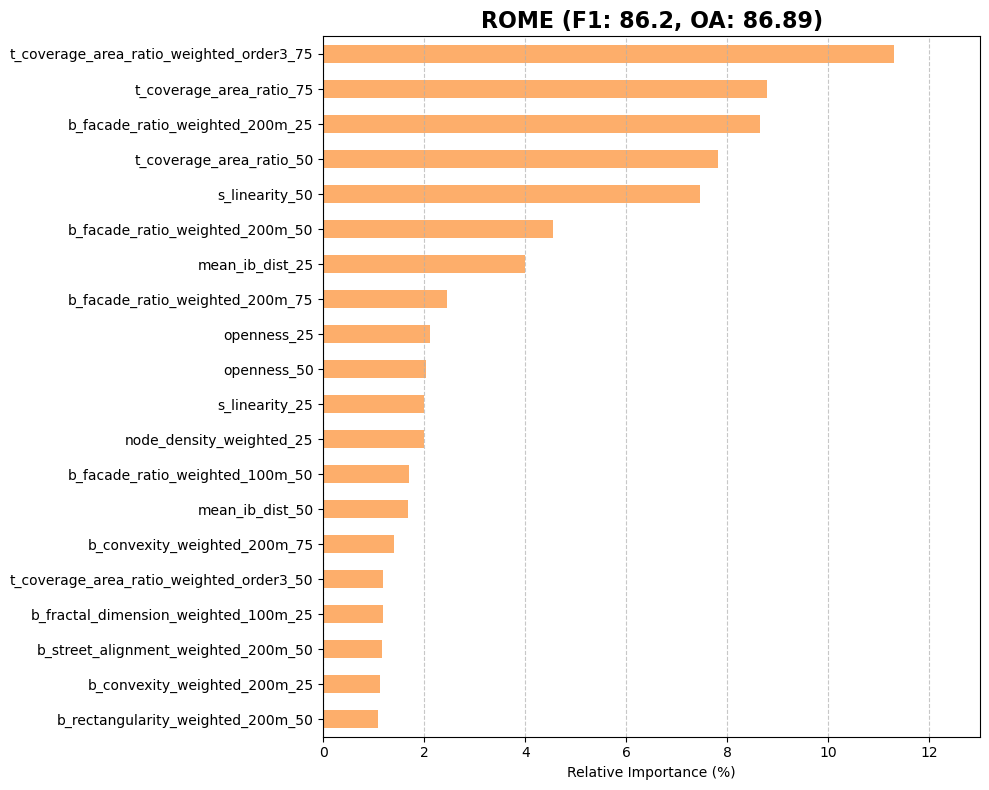

In [51]:
# get 20 most important morphometrics of the best non-weighted model
feature_importance = pd.Series(best_non_weighted_model.feature_importances_, index=best_non_weighted_model.feature_names_in_)
top_features = feature_importance.sort_values(ascending=False).head(20)
top_features_percent = top_features * 100

# figure
fig, ax = plt.subplots(figsize=(10, 8))
top_features_percent.sort_values().plot(kind='barh', color='#fdae6b', ax=ax)

ax.set_xlabel('Relative Importance (%)')
ax.set_title(f'ROME (F1: {best_models_df.loc["non_weighted_model"]["wF1"].iloc[0]}, OA: {best_models_df.loc["non_weighted_model"]["OA"].iloc[0]})', fontweight='bold', fontsize=16)
ax.set_xlim(0, 13)
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
#plt.savefig('S1_paris_importances.png', dpi=300, bbox_inches='tight')
plt.show()

In [52]:
top_features_percent.to_csv(r'results\s1\rome_S1_top_features_non_weighted_model.csv')

In [ ]:
## rasterize
# filepath to Sentinel-2 imagery (raster to match)
imagery = r'imagery\rome_20170620.tif'

# output
output_path = r'rasterized_morphometrics\rome_rasterized_morphometrics_fold2.tif'

utils.rasterize_top20_morphometrics(imagery, output_path, data, best_non_weighted_model)

### Best RF weighted model

In [53]:
# choose the best weighted model
best_weighted_model = best_models_df.loc["weighted_model"].iloc[0]["Model"]

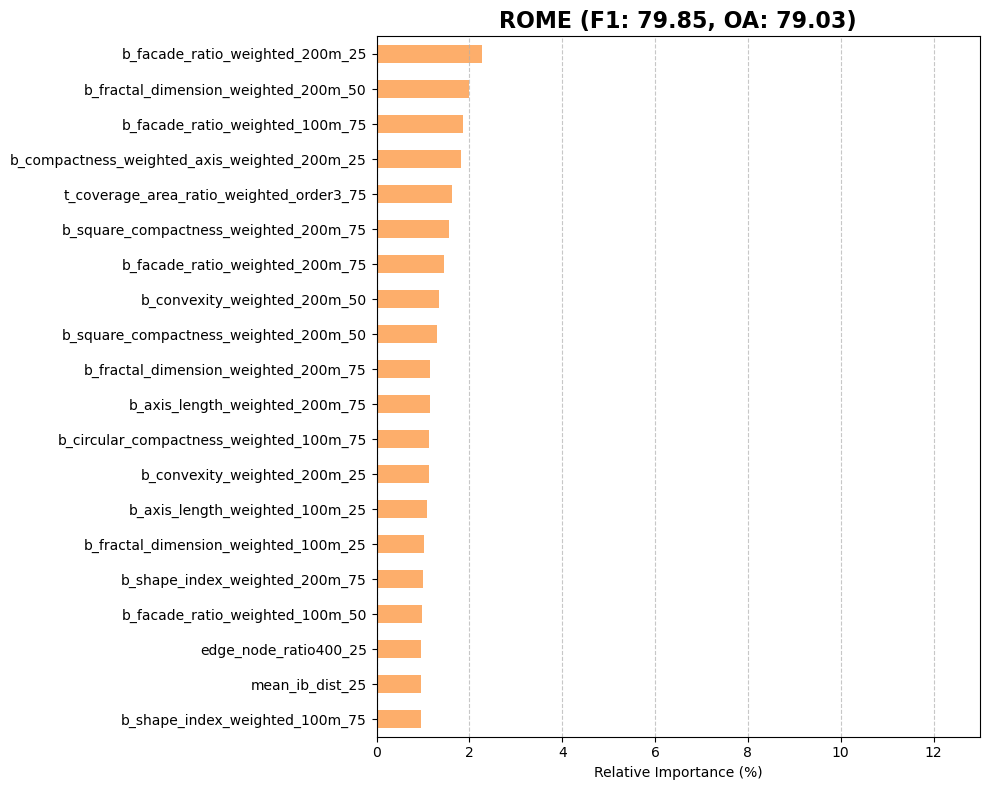

In [54]:
# get 20 most important morphometrics of the best weighted model
feature_importance = pd.Series(best_weighted_model.feature_importances_, index=best_weighted_model.feature_names_in_)
top_features = feature_importance.sort_values(ascending=False).head(20)
top_features_percent = top_features * 100

# figure
fig, ax = plt.subplots(figsize=(10, 8))
top_features_percent.sort_values().plot(kind='barh', color='#fdae6b', ax=ax)

ax.set_xlabel('Relative Importance (%)')
ax.set_title(f'ROME (F1: {best_models_df.loc["weighted_model"]["wF1"].iloc[0]}, OA: {best_models_df.loc["weighted_model"]["OA"].iloc[0]})', fontweight='bold', fontsize=16)
ax.set_xlim(0, 13)
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [55]:
top_features_percent.to_csv(r'results\s1\rome_S1_top_features_weighted_model.csv')

In [ ]:
## rasterize them
# filepath to Sentinel-2 imagery (raster to match)
imagery = r'imagery\rome_20170620.tif'

# output
output_path = r'rasterized_morphometrics\rome_rasterized_morphometrics_fold2_weighted.tif'

utils.rasterize_top20_morphometrics(imagery, output_path, data, best_weighted_model)

# Sao Paulo

## Data import

In [2]:
# load splited reference data
splited_ref_data = gpd.read_file(r'ref_data\saopaulo_ref_splitS1.gpkg')

# load tessellation cells with morphometrics
data = gpd.read_parquet(r'momepy\saopaulo_morphometrics.parquet')

In [3]:
# results[setup][strategy][fold]
results = {
    strat: {
        fold: {} for fold in folds
    } for strat in strategies
}

### Fold 0

In [4]:
fold=0
fold0_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [5]:
X_train = fold0_data["X_train"]
y_train = fold0_data["y_train"]
X_test = fold0_data["X_test"]
y_test = fold0_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=3, max_features=X_train.shape[1], class_weight=False)

In [ ]:
param, train, test, diff

In [6]:
model_fold0 = ensemble.RandomForestClassifier(random_state=seed, n_jobs=-1, max_depth=1, max_features=61, n_estimators=100)

model_fold0.fit(X_train, y_train)
pred_test = model_fold0.predict(X_test)

In [7]:
# training accuracy
pred_train = model_fold0.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  85.94
wF1 train:  82.0


In [8]:
# test accuracy
pred_test = model_fold0.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold0,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)

results["non_weighted_model"][fold] = accuracies

OA test:  80.99
wF1 test:  75.3


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [9]:
model_fold0_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=seed, n_jobs=-1, max_depth=1, max_features=16, n_estimators=100)

model_fold0_weighted.fit(X_train, y_train)
pred_test = model_fold0_weighted.predict(X_test)

In [10]:
# training accuracy
pred_train = model_fold0_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  85.04
wF1 train:  85.74


In [11]:
# test accuracy
pred_test = model_fold0_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold0_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)

results["weighted_model"][fold] = accuracies

OA test:  79.01
wF1 test:  79.74


### Fold 1

In [12]:
fold=1
fold1_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [13]:
X_train = fold1_data["X_train"]
y_train = fold1_data["y_train"]
X_test = fold1_data["X_test"]
y_test = fold1_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=False)

In [ ]:
param, train, test, diff

In [14]:
model_fold1 = ensemble.RandomForestClassifier(random_state=seed, n_jobs=-1, max_depth=24, max_features=23, n_estimators=100)

model_fold1.fit(X_train, y_train)
pred_test = model_fold1.predict(X_test)

In [15]:
# training accuracy
pred_train = model_fold1.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  100.0
wF1 train:  100.0


In [16]:
# test accuracy
pred_test = model_fold1.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold1,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)

results["non_weighted_model"][fold] = accuracies

OA test:  95.6
wF1 test:  94.58


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [17]:
model_fold1_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=seed, n_jobs=-1, max_depth=13, max_features=19, n_estimators=100)

model_fold1_weighted.fit(X_train, y_train)
pred_test = model_fold1_weighted.predict(X_test)

In [18]:
# training accuracy
pred_train = model_fold1_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  99.23
wF1 train:  99.24


In [19]:
# test accuracy
pred_test = model_fold1_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold1_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["weighted_model"][fold] = accuracies

OA test:  95.48
wF1 test:  94.58


### Fold 2

In [20]:
fold=2
fold2_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [21]:
X_train = fold2_data["X_train"]
y_train = fold2_data["y_train"]
X_test = fold2_data["X_test"]
y_test = fold2_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=False)

In [22]:
model_fold2 = ensemble.RandomForestClassifier(random_state=seed, n_jobs=-1, max_depth=7, max_features=48, n_estimators=100)

model_fold2.fit(X_train, y_train)
pred_test = model_fold2.predict(X_test)

In [23]:
# training accuracy
pred_train = model_fold2.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  96.92
wF1 train:  96.64


In [24]:
# test accuracy
pred_test = model_fold2.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold2,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["non_weighted_model"][fold] = accuracies

OA test:  92.19
wF1 test:  91.2


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [25]:
model_fold2_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=seed, n_jobs=-1, max_depth=8, max_features=9, n_estimators=100)

model_fold2_weighted.fit(X_train, y_train)
pred_test = model_fold2_weighted.predict(X_test)

In [26]:
# training accuracy
pred_train = model_fold2_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  92.91
wF1 train:  93.54


In [27]:
# test accuracy
pred_test = model_fold2_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold2_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["weighted_model"][fold] = accuracies

OA test:  86.73
wF1 test:  88.78


### Fold 3

In [28]:
fold=3
fold3_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [29]:
X_train = fold3_data["X_train"]
y_train = fold3_data["y_train"]
X_test = fold3_data["X_test"]
y_test = fold3_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=False)

In [ ]:
param, train, test, diff

In [30]:
model_fold3 = ensemble.RandomForestClassifier(random_state=seed, n_jobs=-1, max_depth=2, max_features=25, n_estimators=100)

model_fold3.fit(X_train, y_train)
pred_test = model_fold3.predict(X_test)

In [31]:
# training accuracy
pred_train = model_fold3.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  89.49
wF1 train:  86.91


In [32]:
# test accuracy
pred_test = model_fold3.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold3,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["non_weighted_model"][fold] = accuracies

OA test:  84.62
wF1 test:  80.93


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=6, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [33]:
model_fold3_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=seed, n_jobs=-1, max_depth=2, max_features=12, n_estimators=100)

model_fold3_weighted.fit(X_train, y_train)
pred_test = model_fold3_weighted.predict(X_test)

In [34]:
# training accuracy
pred_train = model_fold3_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  84.4
wF1 train:  84.59


In [35]:
# test accuracy
pred_test = model_fold3_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold3_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["weighted_model"][fold] = accuracies

OA test:  87.26
wF1 test:  87.13


### Fold 4

In [36]:
fold=4
fold4_data = utils.extract_fold_data(data, splited_ref_data, fold=fold)

In [37]:
X_train = fold4_data["X_train"]
y_train = fold4_data["y_train"]
X_test = fold4_data["X_test"]
y_test = fold4_data["y_test"]

#### Non-weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=False)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=2, max_features=X_train.shape[1], class_weight=False)

In [ ]:
param, train, test, diff

In [38]:
model_fold4 = ensemble.RandomForestClassifier(random_state=seed, n_jobs=-1, max_depth=9, max_features=3, n_estimators=100)

model_fold4.fit(X_train, y_train)
pred_test = model_fold4.predict(X_test)

In [39]:
# training accuracy
pred_train = model_fold4.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  96.19
wF1 train:  95.73


In [40]:
# test accuracy
pred_test = model_fold4.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold4,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)

results["non_weighted_model"][fold] = accuracies

OA test:  95.75
wF1 test:  94.91


#### Weighted RF model

In [ ]:
utils.finetune_height(X_train, y_train, X_test, y_test, max_height=10, class_weight=True)

In [ ]:
param, train, test, diff = utils.finetune_max_features(X_train, y_train, X_test, y_test, height=6, max_features=X_train.shape[1], class_weight=True)

In [ ]:
param, train, test, diff

In [41]:
model_fold4_weighted = ensemble.RandomForestClassifier(class_weight='balanced', random_state=seed, n_jobs=-1, max_depth=3, max_features=8, n_estimators=100)

model_fold4_weighted.fit(X_train, y_train)
pred_test = model_fold4_weighted.predict(X_test)

In [42]:
# training accuracy
pred_train = model_fold4_weighted.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, pred_train)
print('OA train: ', round(train_accuracy*100,2))
train_wf1 = metrics.f1_score(y_train, pred_train, average='weighted', labels=np.unique(y_train))
print('wF1 train: ', round(train_wf1*100,2))

OA train:  85.79
wF1 train:  87.26


In [43]:
# test accuracy
pred_test = model_fold4_weighted.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, pred_test)
print('OA test: ', round(test_accuracy*100,2))
test_wf1 = metrics.f1_score(y_test, pred_test, average='weighted', labels=np.unique(y_test))
print('wF1 test: ', round(test_wf1*100,2))

conf_mat = confusion_matrix(y_test, pred_test, labels=sorted(splited_ref_data['gridcode'].unique()))

accuracies = {
    "OA":  round(test_accuracy*100,2),
    "wF1": round(test_wf1*100,2),
    "Model": model_fold4_weighted,
    "Confusion_Matrix": conf_mat
}

for c in all_possible_classes:
    accuracies[f"F1_Class_{c}"] = np.nan
f1_per_class_array = f1_score(y_test, pred_test, average=None, labels=np.unique(y_test))
for label, score in zip(np.unique(y_test), f1_per_class_array):
    if label in all_possible_classes:
        accuracies[f"F1_Class_{int(label)}"] = round(score*100, 2)
        
results["weighted_model"][fold] = accuracies

OA test:  78.81
wF1 test:  83.07


## Evaluation

In [44]:
df = pd.DataFrame.from_dict({
    (i, j): results[i][j] 
    for i in results.keys() 
    for j in results[i].keys() 
}, orient='index')

df.index.names = ["Strategy", "Fold"]
df

OA    wF1  \
Strategy           Fold                 
non_weighted_model 0     80.99  75.30   
                   1     95.60  94.58   
                   2     92.19  91.20   
                   3     84.62  80.93   
                   4     95.75  94.91   
weighted_model     0     79.01  79.74   
                   1     95.48  94.58   
                   2     86.73  88.78   
                   3     87.26  87.13   
                   4     78.81  83.07   

                                                                     Model  \
Strategy           Fold                                                      
non_weighted_model 0     (DecisionTreeClassifier(max_depth=1, max_featu...   
                   1     (DecisionTreeClassifier(max_depth=24, max_feat...   
                   2     (DecisionTreeClassifier(max_depth=7, max_featu...   
                   3     (DecisionTreeClassifier(max_depth=2, max_featu...   
                   4     (DecisionTreeClassifier(max_depth=9, max_featu...   
weighted_model     0     (DecisionTreeClassifier(max_depth=1, max_featu...   
                   1     (DecisionTreeClassifier(max_depth=13, max_feat...   
                   2     (DecisionTreeClassifier(max_depth=8, max_featu...   
                   3     (DecisionTreeClassifier(max_depth=2, max_featu...   
                   4     (DecisionTreeClassifier(max_depth=3, max_featu...   

                                                          Confusion_Matrix  \
Strategy           Fold                                                      
non_weighted_model 0     [[0, 0, 232, 0, 0, 2847, 0, 0, 0], [0, 0, 528,...   
                   1     [[3623, 3, 176, 31, 58, 13, 22, 0, 0], [25, 1,...   
                   2     [[2811, 12, 966, 0, 0, 0, 5, 0, 0], [58, 2, 38...   
                   3     [[42, 0, 2289, 0, 0, 1624, 0, 0, 0], [52, 0, 3...   
                   4     [[2773, 0, 6, 6, 0, 13, 0, 0, 0], [77, 0, 208,...   
weighted_model     0     [[2594, 19, 46, 90, 0, 229, 100, 0, 1], [41, 2...   
                   1     [[3689, 19, 119, 8, 65, 8, 18, 0, 0], [3, 31, ...   
                   2     [[3188, 525, 29, 51, 1, 0, 0, 0, 0], [0, 484, ...   
                   3     [[1313, 0, 1384, 0, 2, 1220, 36, 0, 0], [2, 17...   
                   4     [[2734, 0, 0, 17, 0, 0, 47, 0, 0], [23, 346, 2...   

                         F1_Class_1  F1_Class_2  F1_Class_3  F1_Class_4  \
Strategy           Fold                                                   
non_weighted_model 0           0.00        0.00       96.10        0.00   
                   1          92.93        0.39       98.72       19.73   
                   2          80.14        0.79       97.55       20.86   
                   3           1.39        0.00       95.59        0.00   
                   4          91.70        0.00       98.53        0.00   
weighted_model     0          42.14       20.14       93.50        6.39   
                   1          91.26       10.40       98.69       16.24   
                   2          69.72       27.30       95.03       45.46   
                   3          37.37       18.97       95.57        0.00   
                   4          52.33       25.65       90.57        0.26   

                         F1_Class_5  F1_Class_6  F1_Class_7  F1_Class_8  \
Strategy           Fold                                                   
non_weighted_model 0           0.00       56.35         NaN        0.00   
                   1          35.06       84.45         NaN       97.31   
                   2          69.30       73.17         NaN       89.80   
                   3           0.00       62.14         NaN       16.66   
                   4          59.71       89.60         NaN       86.23   
weighted_model     0           4.51       57.32         NaN       80.86   
                   1          27.87       86.26         NaN       96.50   
                   2          70.72       65.94         NaN       88.48   
          

In [45]:
# mean metrics across folds
df_metrics = df.drop(columns=["Model","Confusion_Matrix"])
averages = df_metrics.groupby(["Strategy"]).mean().round(2)
averages

,OA,wF1,F1_Class_1,F1_Class_2,F1_Class_3,F1_Class_4,F1_Class_5,F1_Class_6,F1_Class_7,F1_Class_8,F1_Class_9,F1_Class_10
Strategy,,,,,,,,,,,,
non_weighted_model,89.83,87.38,53.23,0.24,97.30,8.12,32.81,73.14,NaN,58.0,5.80,15.44
weighted_model,85.46,86.66,58.56,20.49,94.67,13.67,31.89,67.21,NaN,86.7,28.17,25.20


In [62]:
# export results
df_metrics.to_csv(r"results\s1\saopaulo_S1_results.csv")

## Confusion Matrix

In [46]:
better_strategy = df.groupby("Strategy")["wF1"].mean().idxmax()
better_strategy

'non_weighted_model'

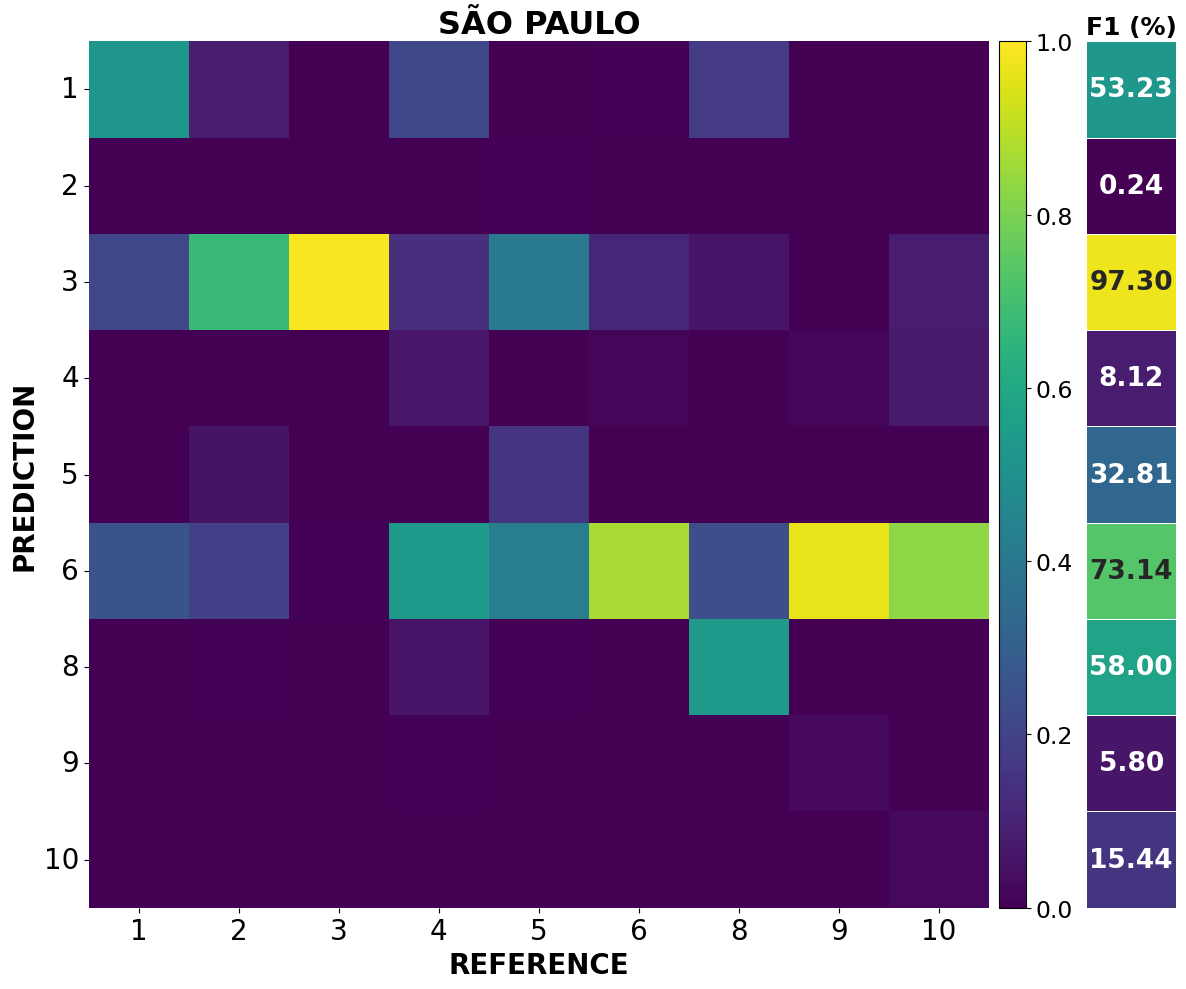

In [47]:
ordered_labels = sorted(splited_ref_data['gridcode'].unique())
stats_row = averages.loc[better_strategy]
f1_values = []
for label in ordered_labels:
    col_name = f"F1_Class_{label}"
    val = stats_row.get(col_name, np.nan)
    f1_values.append(val)

f1_matrix = np.array(f1_values).reshape(-1, 1)

total_cm = None
for fold in results[better_strategy]:
    fold_cm = results[better_strategy][fold]["Confusion_Matrix"]
    if total_cm is None:
        total_cm = fold_cm.copy()
    else:
        total_cm += fold_cm

row_sums = total_cm.sum(axis=1)[:, np.newaxis]
norm_cm = total_cm.astype('float') / (row_sums + 1e-10)
plot_matrix = norm_cm.T 

# Create Figure
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(plot_matrix, 
            annot=False, 
            fmt='.2f', 
            cmap='viridis', 
            vmin=0.0, 
            vmax=1.0, 
            xticklabels=ordered_labels, 
            yticklabels=ordered_labels,
            cbar=False, 
            ax=ax)
divider = make_axes_locatable(ax)
# colorbar
cax = divider.append_axes("right", size="3%", pad=0.1)
plt.colorbar(ax.collections[0], cax=cax)
cax.tick_params(labelsize=17)
# f1
f1_ax = divider.append_axes("right", size="10%", pad=0.6)
sns.heatmap(f1_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='viridis', 
            cbar=False,   
            xticklabels=[],
            yticklabels=[], 
            ax=f1_ax,
            vmin=0, vmax=100,
           annot_kws={'size': 19, 'weight': 'bold'},
           linewidths=.7,
            linecolor='white')
f1_ax.set_title("F1 (%)", fontsize=18, fontweight='bold', pad=5)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20, rotation=0)
ax.set_xlabel('REFERENCE', fontsize=20, fontweight='bold')
ax.set_ylabel('PREDICTION', fontsize=20, fontweight='bold')
ax.set_title('SÃO PAULO', fontweight='bold', fontsize=23)
plt.tight_layout()
plt.savefig(r'figures\S1_saopaulo_matrix_v2.png', dpi=500, bbox_inches='tight')
plt.show()

In [48]:
np.save(r"results\s1\saopaulo_S1_summed_cm.npy", total_cm)

## Prediction

In [57]:
better_strategy = df.groupby("Strategy")["wF1"].mean().idxmax()
better_strategy

'non_weighted_model'

In [58]:
models = df.loc[better_strategy, "Model"].tolist()
models

[RandomForestClassifier(max_depth=1, max_features=61, n_jobs=-1, random_state=0),
 RandomForestClassifier(max_depth=24, max_features=23, n_jobs=-1, random_state=0),
 RandomForestClassifier(max_depth=7, max_features=48, n_jobs=-1, random_state=0),
 RandomForestClassifier(max_depth=2, max_features=25, n_jobs=-1, random_state=0),
 RandomForestClassifier(max_depth=9, max_features=3, n_jobs=-1, random_state=0)]

In [59]:
data_for_pred = data.drop(['focal', 'geometry'], axis=1)
for f, m in enumerate(models):
    pred = m.predict(data_for_pred)
    classified = data['geometry']
    classified = gpd.GeoDataFrame(classified)
    classified['class'] = pred
    classified.to_parquet(fr"outputs\s1\saopaulo_S1_fold{folds[f]}.parquet", compression='zstd')
    print(fr"outputs\s1\saopaulo_S1_fold{folds[f]}.parquet saved")

E:\HuginoM\lcz_outputs\saopaulo_S1_fold0.gpkg saved
E:\HuginoM\lcz_outputs\saopaulo_S1_fold1.gpkg saved
E:\HuginoM\lcz_outputs\saopaulo_S1_fold2.gpkg saved
E:\HuginoM\lcz_outputs\saopaulo_S1_fold3.gpkg saved
E:\HuginoM\lcz_outputs\saopaulo_S1_fold4.gpkg saved


## Aggregation to 100m

In [ ]:
folds=[0,1,2,3,4]
for fold in folds:
    input_filename = fr"outputs\s1\saopaulo_S1_fold{fold}.parquet"
    output_filename = fr"outputs\s1\saopaulo_S1_fold{fold}_100m.parquet"
    utils.aggregate(input_filename, "class", 100, output_filename)

In [12]:
aggr_results = []
for fold in folds:
    pred_path = fr"outputs\s1\saopaulo_S1_fold{fold}_100m.parquet"
    pred_gdf = gpd.read_parquet(pred_path)
    
    test_polygons = splited_ref_data[splited_ref_data["fold"] == fold].copy()
    
    pred_centroids = pred_gdf.copy()
    pred_centroids['geometry'] = pred_centroids.centroid
    
    joined = gpd.sjoin(pred_centroids, test_polygons, how='left', predicate='within')
    
    if 'gridcode' in joined.columns:
        joined = joined.rename(columns={'gridcode': 'y_true'})
    else:
        print(f"Fold {fold}: No grid centers fell inside test polygons")
        continue

    valid_data = joined.dropna(subset=['class', 'y_true'])
    
    y_pred = valid_data['class']
    y_true = valid_data['y_true']
    
    if len(y_true) == 0:
        print(f"Fold {fold}: No valid data")
        continue

    oa = metrics.accuracy_score(y_true, y_pred)
    wf1 = metrics.f1_score(y_true, y_pred, average='weighted')
    
    current_labels = sorted(list(set(y_true) | set(y_pred)))
    f1_per_class = metrics.f1_score(y_true, y_pred, average=None, labels=current_labels)
    
    fold_res = {
        'Fold': fold,
        'OA': round(oa*100,2),
        'wF1': round(wf1*100,2)
    }

    for c in all_possible_classes:
        fold_res[f"F1_Class_{c}"] = np.nan
    
    for label, score in zip(current_labels, f1_per_class):
        if label in all_possible_classes:
            fold_res[f"F1_Class_{int(label)}"] = round(score * 100, 2)
        
    aggr_results.append(fold_res)

In [13]:
aggregated_res_df = pd.DataFrame(aggr_results).set_index("Fold")
aggregated_res_df

,OA,wF1,F1_Class_1,F1_Class_2,F1_Class_3,F1_Class_4,F1_Class_5,F1_Class_6,F1_Class_7,F1_Class_8,F1_Class_9,F1_Class_10
Fold,,,,,,,,,,,,
0,54.63,44.27,0.00,0.0,93.56,0.00,0.00,44.38,NaN,0.00,0.00,0.00
1,91.08,88.96,92.63,0.0,97.75,41.07,30.77,79.95,NaN,98.40,0.00,42.86
2,82.41,80.96,84.21,0.0,95.67,30.90,72.41,64.47,NaN,95.61,14.14,NaN
3,62.17,58.51,1.50,0.0,92.76,0.00,0.00,59.49,NaN,19.68,NaN,NaN
4,88.45,85.12,94.71,0.0,96.53,0.00,60.38,85.94,NaN,89.07,0.00,NaN


In [14]:
aggregated_res_df.to_csv(r"results\s1\saopaulo_S1_aggregated_results.csv")

## Rasterization of top morphometrics

For fusion-based predictions (S3-S4) rasterize top 20 most important morphometrics of the best non-weighted and weighted model (determined by model's F1).

In [49]:
best_models_df = df.sort_values("wF1", ascending=False).groupby("Strategy").head(1)
best_models_df

,,OA,wF1,Model,Confusion_Matrix,F1_Class_1,F1_Class_2,F1_Class_3,F1_Class_4,F1_Class_5,F1_Class_6,F1_Class_7,F1_Class_8,F1_Class_9,F1_Class_10
Strategy,Fold,,,,,,,,,,,,,,
non_weighted_model,4,95.75,94.91,"(DecisionTreeClassifier(max_depth=9, max_featu...","[[2773, 0, 6, 6, 0, 13, 0, 0, 0], [77, 0, 208,...",91.70,0.0,98.53,0.00,59.71,89.60,NaN,86.23,NaN,NaN
weighted_model,1,95.48,94.58,"(DecisionTreeClassifier(max_depth=13, max_feat...","[[3689, 19, 119, 8, 65, 8, 18, 0, 0], [3, 31, ...",91.26,10.4,98.69,16.24,27.87,86.26,NaN,96.50,0.0,0.0


### Best non-weighted RF model

In [50]:
# select the best non-weighted model
best_non_weighted_model = best_models_df.loc["non_weighted_model"].iloc[0]["Model"]

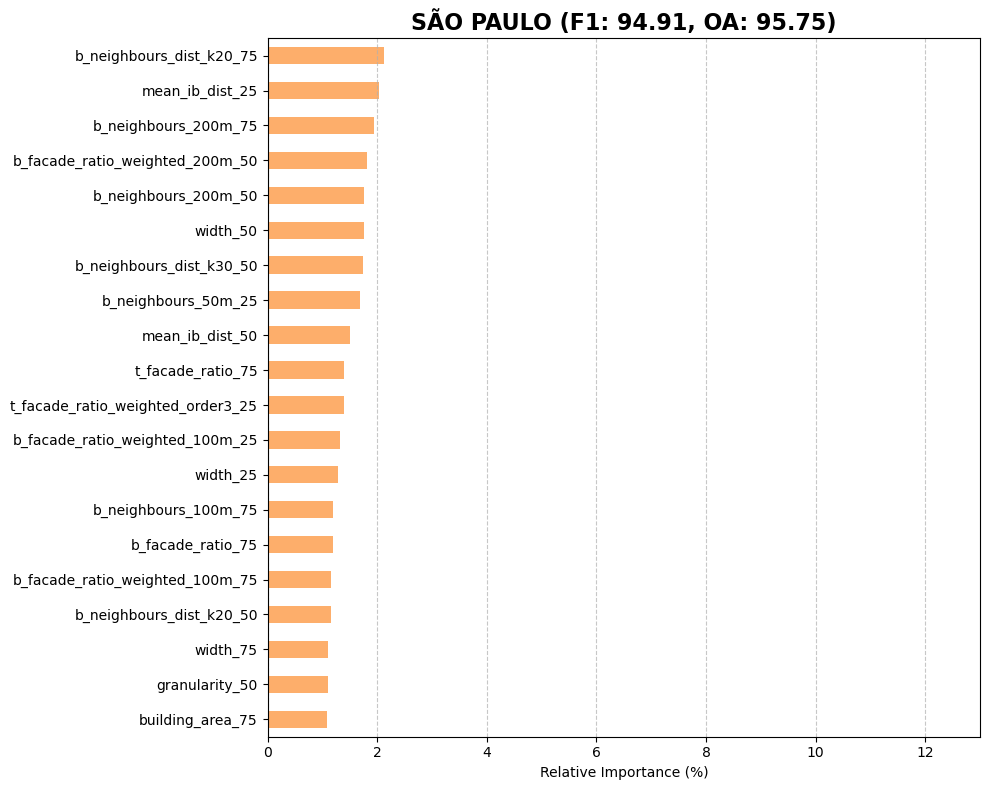

In [51]:
# get 20 most important morphometrics of the best non-weighted model
feature_importance = pd.Series(best_non_weighted_model.feature_importances_, index=best_non_weighted_model.feature_names_in_)
top_features = feature_importance.sort_values(ascending=False).head(20)
top_features_percent = top_features * 100

# figure
fig, ax = plt.subplots(figsize=(10, 8))
top_features_percent.sort_values().plot(kind='barh', color='#fdae6b', ax=ax)

ax.set_xlabel('Relative Importance (%)')
ax.set_title(f'SÃO PAULO (F1: {best_models_df.loc["non_weighted_model"]["wF1"].iloc[0]}, OA: {best_models_df.loc["non_weighted_model"]["OA"].iloc[0]})', fontweight='bold', fontsize=16)
ax.set_xlim(0, 13)
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
#plt.savefig('S1_saopaulo_importances.png', dpi=300, bbox_inches='tight')
plt.show()

In [53]:
top_features_percent.to_csv(r'results\s1\saopaulo_S1_top_features_non_weighted_model.csv')

In [ ]:
## rasterize
# filepath to Sentinel-2 imagery (raster to match)
imagery = r'imagery\sao_paulo_20170726.tif'

# output
output_path = r'rasterized_morphometrics\saopaulo_rasterized_morphometrics_fold4.tif'

utils.rasterize_top20_morphometrics(imagery, output_path, data, best_non_weighted_model)

### Best RF weighted model

In [54]:
# choose the best weighted model
best_weighted_model = best_models_df.loc["weighted_model"].iloc[0]["Model"]

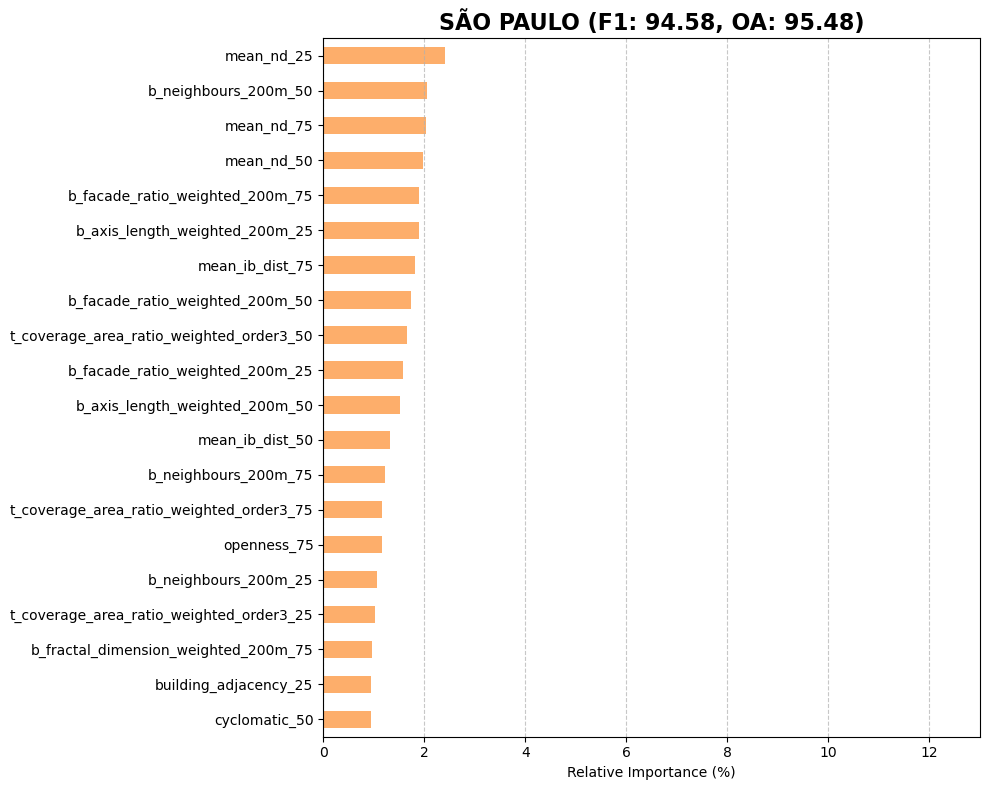

In [55]:
# get 20 most important morphometrics of the best weighted model
feature_importance = pd.Series(best_weighted_model.feature_importances_, index=best_weighted_model.feature_names_in_)
top_features = feature_importance.sort_values(ascending=False).head(20)
top_features_percent = top_features * 100

# figure
fig, ax = plt.subplots(figsize=(10, 8))
top_features_percent.sort_values().plot(kind='barh', color='#fdae6b', ax=ax)

ax.set_xlabel('Relative Importance (%)')
ax.set_title(f'SÃO PAULO (F1: {best_models_df.loc["weighted_model"]["wF1"].iloc[0]}, OA: {best_models_df.loc["weighted_model"]["OA"].iloc[0]})', fontweight='bold', fontsize=16)
ax.set_xlim(0, 13)
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [56]:
top_features_percent.to_csv(r'results\s1\saopaulo_S1_top_features_weighted_model.csv')

In [ ]:
## rasterize them
# filepath to Sentinel-2 imagery (raster to match)
imagery = r'imagery\sao_paulo_20170726.tif'

# output
output_path = r'rasterized_morphometrics\saopaulo_rasterized_morphometrics_fold1_weighted.tif'

utils.rasterize_top20_morphometrics(imagery, output_path, data, best_weighted_model)